In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
from Bio.SeqUtils import GC
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import researchpy as rp
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cv2 as cv

sns.set_context(rc = {'legend.fontsize': 8, 'ytick.labelsize': 8, 'xtick.labelsize':8, 'axes.labelsize':8})
matplotlib.rcParams["font.family"] = "Arial"
miami_vice_warms = ['#C40869','#F62E97','#FA89C4'][::-1]
miami_vice_warms = ['white','grey','black']
x = sns.light_palette("seagreen").as_hex()
greens = [x[1],x[3],x[-1]]
y = sns.light_palette("steelblue").as_hex()
blues = [y[1],y[3],y[-1]]

pink = '#D48FB3'
blue = (0.29411764705882354, 0.7058823529411764, 1.0)

In [2]:
blues

['#cedbe6', '#8aaecd', '#4682b4']

# figure 1

In [3]:
fig = plt.figure(figsize=(9,10))
gs1 = gridspec.GridSpec(17,10,wspace=0.0)
gs2 = gridspec.GridSpec(17,10,hspace=0.0,wspace=0.0)

a_gs = fig.add_subplot(gs1[0:5, 0:4])
b_gs = fig.add_subplot(gs1[0:5, 5:7])
c_gs = fig.add_subplot(gs1[0:5, 8:10])

di_gs = fig.add_subplot(gs2[6:8, 0:4])
ei_gs = fig.add_subplot(gs2[9:11, 0:4])
fi_gs = fig.add_subplot(gs2[12:14, 0:4])
gi_gs = fig.add_subplot(gs2[15:17, 0:4])

dii_gs = fig.add_subplot(gs2[6:8, 5:7])
eii_gs = fig.add_subplot(gs2[9:11, 5:7])
fii_gs = fig.add_subplot(gs2[12:14, 5:7])
gii_gs = fig.add_subplot(gs2[15:17, 5:7])

diii_gs = fig.add_subplot(gs2[6:8, 8:10])
eiii_gs = fig.add_subplot(gs2[9:11, 8:10])
fiii_gs = fig.add_subplot(gs2[12:14, 8:10])
giii_gs = fig.add_subplot(gs2[15:17, 8:10])

# ============ A ============
a_gs.annotate(f'A', xy=(-0.225, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
dfcon = pd.read_excel('2022.9.13 publication rfp.xlsx',sheet_name='data_con')
dfcon_mean = dfcon.groupby('Promoter').mean()
dfcon_std = dfcon.groupby('Promoter').std()
dfcon_mean['ag_std'] = dfcon_std['Norm_RFP_Agro']
dfcon_mean['ec_std'] = dfcon_std['Norm_RFP_Ecoli']
df_at_con = pd.read_excel('2021.9.15 at and nb agro.xlsx',sheet_name='data_at_con')
df_at_con['RFP_corr'] = df_at_con['RFP'] - 211.583333
df_at_con = df_at_con[df_at_con.Strain !='Leaf']
df_at_con.Strain = df_at_con.Strain.str.replace("p",'J23')
df_at_con[df_at_con.Day=='3 dpi'].groupby(['Strain','Day']).mean()
dfcon_mean['dpi3_Arabidopsis_mean'] = df_at_con[df_at_con.Day=='3 dpi'].groupby(['Strain']).mean()['RFP_corr']
dfcon_mean['dpi3_Arabidopsis_std'] = df_at_con[df_at_con.Day=='3 dpi'].groupby(['Strain']).std()['RFP_corr']
dfcon_mean = dfcon_mean.reset_index()
dfcon_mean=dfcon_mean[dfcon_mean.Promoter !='Control']
df_nb_con = pd.read_excel('2021.9.15 at and nb agro.xlsx',sheet_name='new_nb')
df_nb_con['RFP'] = df_nb_con['RFP'] - 301
df_nb_con[df_nb_con.Day==3].groupby(['Strain']).mean()['RFP']
dfcon_mean = dfcon_mean.set_index('Promoter')
dfcon_mean['dpi3_Tobacco_mean'] = df_nb_con[df_nb_con.Day==3].groupby(['Strain']).mean()['RFP']
dfcon_mean['dpi3_Tobacco_std'] = df_nb_con[df_nb_con.Day==3].groupby(['Strain']).std()['RFP']
dfcon_mean = dfcon_mean.reset_index()
dfcon_mean['Strain'] = dfcon_mean['Promoter']
query = dfcon_mean[dfcon_mean.Strain!="Control"]
g = sns.scatterplot(data=query,x='dpi3_Tobacco_mean',y='dpi3_Arabidopsis_mean',hue='Norm_RFP_Agro',palette='cool',edgecolor='black',linewidth=1,ax=a_gs)
g.set_ylim(bottom=0,top=5000)
g.set_xlim(right=15000)
norm = plt.Normalize(query['Norm_RFP_Agro'].min(), query['Norm_RFP_Agro'].max())
sm = plt.cm.ScalarMappable(cmap="cool", norm=norm)
sm.set_array([])
inset_ax = inset_axes(a_gs,width="0.001%", height="0.001%", loc=1)
inset_ax.xaxis.set_visible(False)
inset_ax.yaxis.set_visible(False)
inset_ax.set_xticks([])
inset_ax.set_yticks([])
t = g.figure.colorbar(sm,ax=inset_ax,shrink=0.4)
# t.ax.set_yticks([0,10000,20000])
t.ax.set_title('In vitro RFP (AU)',size=8)
g.get_legend().remove()
g.set(xlabel='Tobacco RFP (AU)',ylabel='Arabidopsis RFP (AU)')
sns.despine()

# ============ B ============

b_gs.annotate(f'B', xy=(-0.35, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
dfecon = pd.read_excel('2022.3.28 virE.xlsx',sheet_name='data')
dfecon['GFP_log'] = dfecon.GFP.apply(np.log2)
dfecon = dfecon.dropna()
dfecon.Strain = dfecon.Strain.str.replace("p",'J23')
dfeconsum=rp.summary_cont(dfecon['GFP'].groupby(dfecon['Strain']))
compdfecon = mc.MultiComparison(dfecon['GFP'], dfecon['Strain'])
tbldfecon, a1dfecon, a2dfecon = compdfecon.allpairtest(stats.ttest_ind, method= "bonf")
tmp = query.sort_values('Norm_RFP_Agro')[['Promoter','Norm_RFP_Agro']].copy()
tmp['color'] = sns.color_palette("cool",len(query['Norm_RFP_Agro'].unique()))
tmp = tmp[tmp['Promoter'].isin(['J23114','J23117','J23101','J23100','J23111'])]
dict(zip(tmp['Promoter'],tmp['color']))

pal = {'J23114': (0.1764705882352941, 0.8235294117647058, 1.0),
 'J23117': (0.29411764705882354, 0.7058823529411764, 1.0),
 'J23101': (0.5294117647058824, 0.47058823529411764, 1.0),
 'J23100': (0.6470588235294118, 0.3529411764705882, 1.0),
 'J23111': (0.7647058823529411, 0.23529411764705888, 1.0),
 'WT': 'lightgrey',
'Leaf': 'lightgrey',
'ΔvirE12':'lightgrey'}
my_ko_pal = {Strain: "white" for Strain in dfecon.Strain.unique()}
g = sns.boxplot(data=dfecon, x="Strain", y="GFP_log",palette=pal,width=0.75,showfliers=False,ax=b_gs)
sns.stripplot(data=dfecon, x="Strain", y="GFP_log",size=3, edgecolor='black',palette=pal,linewidth=0.25,color='grey',alpha=0.5,ax=b_gs)
sns.despine()
g.tick_params(axis='x', rotation=90)
g.set_ylim(bottom=8,top=20)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')

# # ============ C ============

c_gs.annotate(f'C', xy=(-0.35, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
df_virEprot = pd.read_excel('virE_comp_vironly.xlsx',sheet_name='data_E')
df_virEprot = df_virEprot[df_virEprot.Strain.isin(['ΔvirE12', 'ΔvirE12 p100', 'ΔvirE12 p101','ΔvirE12 p111', 'ΔvirE12 p114', 'ΔvirE12 p117'])]
df_virEprot.Strain = df_virEprot.Strain.str.replace("ΔvirE12 p",'J23')
my_ko_pal = {Strain: "white" for Strain in df_virEprot.Strain.unique()}
g = sns.barplot(data=df_virEprot[df_virEprot.Protein=='virE2'],x='Strain',y='Count',palette=pal,capsize=0.5,errwidth=1.25,
           edgecolor='black',linewidth=1,
           order=['ΔvirE12', 'J23114','J23117','J23101', 'J23100','J23111'],
           ax=c_gs)
g.set(ylabel='VirE2 Count',xlabel=None)
g.tick_params(axis='x', rotation=90)
sns.despine()

# ============ D ============

di_gs.annotate(f'D', xy=(-0.225, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
di_gs.annotate(f'LacI', xy=(0.025, 1.0), xycoords='axes fraction',va='top', ha='left',size=10,weight='bold')

df_plant_ind_fig = pd.read_excel('2021.9.15 at and nb agro.xlsx',sheet_name='plant_ind_fig')
df_plant_ind_fig['Conc'] = df_plant_ind_fig['Conc'].replace({'Mid':'Medium'})
norm_rfps2 = []
for row in df_plant_ind_fig.iterrows():
    if row[1].Plant == 'Tobacco':
        norm_rfps2.append(row[1].RFP - 401)
    if row[1].Plant == 'Arabidopsis':
        norm_rfps2.append(row[1].RFP - 311)
    if row[1].Plant == 'In vitro':
        norm_rfps2.append(row[1].RFP)

df_plant_ind_fig['Norm_RFP'] = norm_rfps2
df_plant_ind_fig['RFP_log'] = df_plant_ind_fig.Norm_RFP.apply(np.log2)
g = sns.barplot(data=df_plant_ind_fig.query('Promoter == "LacI" & Day == 3'), x='Plant',y='RFP_log',hue='Conc',edgecolor='black',linewidth=1,palette=miami_vice_warms,ax=di_gs,order=['In vitro','Tobacco','Arabidopsis'],capsize=0.125,errwidth=1.25)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{RFP}}$ (AU)')
sns.despine()
g.set_yticks(range(5,16))
g.set_ylim(bottom=5,top=15)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
g.legend().remove()
# legend = g.legend()
# for item in legend.get_texts():
#     item.set_fontsize(4)
# legend.get_title().set_fontsize(8)
# sns.move_legend(
#     g, "upper right",
#     bbox_to_anchor=(1.0, 1.4), ncol=1, title='Induction', frameon=False,
# )


ei_gs.annotate(f'E', xy=(-0.225, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
ei_gs.annotate(f'TetR', xy=(0.025, 1.0), xycoords='axes fraction',va='top', ha='left',size=10,weight='bold')
g = sns.barplot(x='Plant',y='RFP_log',hue='Conc',data=df_plant_ind_fig.query('Promoter == "TetR" & Day == 3'),edgecolor='black',linewidth=1,palette=miami_vice_warms,ax=ei_gs,order=['In vitro','Tobacco','Arabidopsis'],capsize=0.125,errwidth=1.25)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{RFP}}$ (AU)')
# g.set_yticklabels([])
# g.tick_params(left=False)
g.legend().remove()
sns.despine()
g.set_yticks(range(5,16))
g.set_ylim(bottom=5,top=15)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
fi_gs.annotate(f'F', xy=(-0.225, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
fi_gs.annotate(f'NahR', xy=(0.025, 1.0), xycoords='axes fraction',va='top', ha='left',size=10,weight='bold')
g = sns.barplot(x='Plant',y='RFP_log',hue='Conc',data=df_plant_ind_fig.query('Promoter == "NahR" & Day == 3'),edgecolor='black',linewidth=1,palette=miami_vice_warms,ax=fi_gs,order=['In vitro','Tobacco','Arabidopsis'],capsize=0.125,errwidth=1.25)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{RFP}}$ (AU)')
# g.set_yticklabels([])
# g.tick_params(left=False)
g.set_yticks(range(5,16))
g.set_ylim(bottom=5,top=15)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
g.legend().remove()
sns.despine()
gi_gs.annotate(f'G', xy=(-0.225, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
gi_gs.annotate(f'JEx', xy=(0.025, 1.0), xycoords='axes fraction',va='top', ha='left',size=10,weight='bold')
g = sns.barplot(x='Plant',y='RFP_log',hue='Conc',data=df_plant_ind_fig.query('Promoter == "Jungle Express" & Day == 3'),edgecolor='black',linewidth=1,palette=miami_vice_warms,ax=gi_gs,order=['In vitro','Tobacco','Arabidopsis'],capsize=0.125,errwidth=1.25)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{RFP}}$ (AU)')
# g.set_yticklabels([])
# g.tick_params(left=False)
g.set_yticks(range(5,16))
g.set_ylim(bottom=5,top=15)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
g.legend().remove()
sns.despine()
# g.legend_.set_title('Induction')
# g.legend_.set_frame_on(False)

# ============ E ============

dfeind = pd.read_excel('2022.5.2 induc virE vire123 comp.xlsx',sheet_name='data')
dfeind = dfeind[dfeind.Plant != "Empty"]
dfeind['GFP_log'] = dfeind.GFP.apply(np.log2)
dfeind = dfeind.dropna()
dfeind.Strain = dfeind.Strain.str.replace("B1S",'LacI')
dfeind.Strain = dfeind.Strain.str.replace("B2S",'TetR')
dfeind.Strain = dfeind.Strain.str.replace("B3S",'NahR')
dfeind.Strain = dfeind.Strain.str.replace("B5S",'Jungle Express')
dfeind.Strain = dfeind.Strain.str.replace("B6S",'CuO')
dfeind['ID'] = dfeind.Strain + dfeind.Complement
dfeindsum = rp.summary_cont(dfeind['GFP'].groupby(dfeind['ID']))
compdfeind = mc.MultiComparison(dfeind['GFP'], dfeind['ID'])
tbldfeind, a1dfeind, a2dfeind = compdfeind.allpairtest(stats.ttest_ind, method="bonf")
dfeind['Complement'] = dfeind['Complement'].map({'None':'None', 'Half':'Medium', 'Full':'High'})
temp_df = dfeind[dfeind.Strain == 'LacI']
g = sns.boxplot(x="Complement", y="GFP_log", data=temp_df,palette=miami_vice_warms,width=0.75,showfliers=False, ax=dii_gs)
sns.stripplot(x="Complement", y="GFP_log", data=temp_df,size=3, edgecolor='black',linewidth=0.25,palette=miami_vice_warms,alpha=.5,ax=dii_gs)
sns.despine()
dii_gs.axhline(y = np.log2(246477.70), color = 'black', linestyle = 'dashed',linewidth=1)
g.set_ylim(bottom=8,top=20)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')

temp_df = dfeind[dfeind.Strain == 'TetR']
g = sns.boxplot(x="Complement", y="GFP_log", data=temp_df,palette=miami_vice_warms,width=0.75,showfliers=False,ax=eii_gs)
sns.stripplot(x="Complement", y="GFP_log", data=temp_df,size=3, edgecolor='black',linewidth=0.25,palette=miami_vice_warms,alpha=.5,ax=eii_gs)
sns.despine()
eii_gs.axhline(y = np.log2(246477.70), color = 'black', linestyle = 'dashed',linewidth=1)
g.set_ylim(bottom=8,top=20)
# g.set_yticklabels([])
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')

temp_df = dfeind[dfeind.Strain == 'NahR']
g = sns.boxplot(x="Complement", y="GFP_log", data=temp_df,palette=miami_vice_warms,width=0.75,showfliers=False,ax=fii_gs)
sns.stripplot(x="Complement", y="GFP_log", data=temp_df,size=3, edgecolor='black',linewidth=0.25,palette=miami_vice_warms,alpha=.5,ax=fii_gs)
sns.despine()
fii_gs.axhline(y = np.log2(246477.70), color = 'black', linestyle = 'dashed',linewidth=1)
g.set_ylim(bottom=8,top=20)
# g.set_yticklabels([])
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')

temp_df = dfeind[dfeind.Strain == 'Jungle Express']
g = sns.boxplot(x="Complement", y="GFP_log", data=temp_df,palette=miami_vice_warms,width=0.75,showfliers=False,ax=gii_gs)
sns.stripplot(x="Complement", y="GFP_log", data=temp_df,size=3, edgecolor='black',linewidth=0.25,palette=miami_vice_warms,alpha=.5,ax=gii_gs)
sns.despine()
gii_gs.axhline(y = np.log2(246477.70), color = 'black', linestyle = 'dashed', linewidth=1)
g.set_ylim(bottom=8,top=20)
# g.set_yticklabels([])
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')

# ============== F ============

df_virE = pd.read_excel('virE_comp_vironly.xlsx',sheet_name='data_E')
dfind = df_virE[df_virE.Strain.isin(['ΔvirE12 pB1S',
       'ΔvirE12 pB2S', 'ΔvirE12 pB3S', 'ΔvirE12 pB5S', 'ΔvirE12 pB6S'])].copy()
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB1S",'LacI')
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB2S",'TetR')
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB3S",'NahR')
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB5S",'Jungle Express')
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB6S",'CuO')
dfind = dfind[dfind.Protein=='virE2']
dfind['Induction'] = dfind['Induction'].map({'None':'None', 'Half':'Medium', 'Full':'High'})

temp_df = dfind[dfind.Strain == 'LacI']
g = sns.barplot(x="Induction", y="Count", data=temp_df,palette=miami_vice_warms,edgecolor='black',linewidth=1,ax=diii_gs,capsize=0.5,errwidth=1.25)
sns.despine()
g.set(xlabel=None,ylabel='VirE2 Count')
g.set_ylim(bottom=0,top=60)
temp_df = dfind[dfind.Strain == 'TetR']
g = sns.barplot(x="Induction", y="Count", data=temp_df,palette=miami_vice_warms,edgecolor='black',linewidth=1,ax=eiii_gs,capsize=0.5,errwidth=1.25)
sns.despine()
g.set(xlabel=None,ylabel='VirE2 Count')
g.set_ylim(bottom=0,top=60)
# g.set_yticklabels([])
temp_df = dfind[dfind.Strain == 'NahR']
g = sns.barplot(x="Induction", y="Count", data=temp_df,palette=miami_vice_warms,edgecolor='black',linewidth=1,ax=fiii_gs,capsize=0.5,errwidth=1.25)
sns.despine()
g.set(xlabel=None,ylabel='VirE2 Count')
g.set_ylim(bottom=0,top=60)
# g.set_yticklabels([])
temp_df = dfind[dfind.Strain == 'Jungle Express']
g = sns.barplot(x="Induction", y="Count", data=temp_df,palette=miami_vice_warms,edgecolor='black',linewidth=1,ax=giii_gs,capsize=0.5,errwidth=1.25)
sns.despine()
g.set(xlabel=None,ylabel='VirE2 Count')
g.set_ylim(bottom=0,top=60)
# g.set_yticklabels([])

fig.savefig(f'fig1.png',dpi=600,transparent=False,bbox_inches='tight')
fig.savefig(f'fig1.pdf',dpi=600,transparent=False,bbox_inches='tight')
plt.show()


AttributeError: 'NoneType' object has no attribute '_get_renderer'

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 900x1000 with 17 Axes>

/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:91: FutureWarning: Passing `palette` without assigning `hue` is deprecated.


/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:184: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:192: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:200: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:208: FutureWarning: Passing `palette` without assigning `hue` is deprecated.


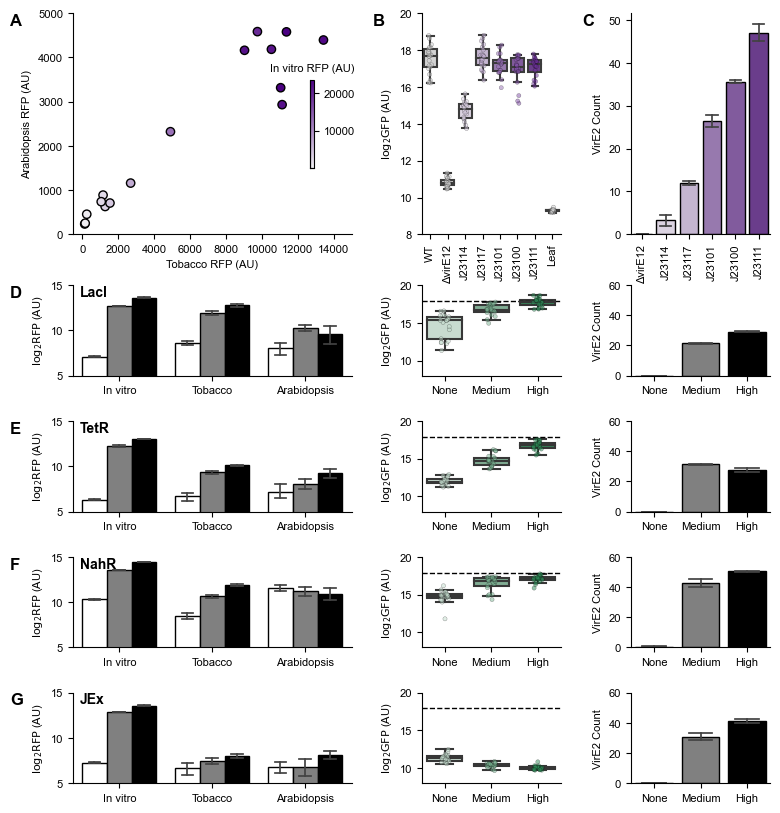

In [ ]:
fig = plt.figure(figsize=(9,10))
gs1 = gridspec.GridSpec(17,10,wspace=0.0)
gs2 = gridspec.GridSpec(17,10,hspace=0.0,wspace=0.0)

a_gs = fig.add_subplot(gs1[0:5, 0:4])
b_gs = fig.add_subplot(gs1[0:5, 5:7])
c_gs = fig.add_subplot(gs1[0:5, 8:10])

di_gs = fig.add_subplot(gs2[6:8, 0:4])
ei_gs = fig.add_subplot(gs2[9:11, 0:4])
fi_gs = fig.add_subplot(gs2[12:14, 0:4])
gi_gs = fig.add_subplot(gs2[15:17, 0:4])

dii_gs = fig.add_subplot(gs2[6:8, 5:7])
eii_gs = fig.add_subplot(gs2[9:11, 5:7])
fii_gs = fig.add_subplot(gs2[12:14, 5:7])
gii_gs = fig.add_subplot(gs2[15:17, 5:7])

diii_gs = fig.add_subplot(gs2[6:8, 8:10])
eiii_gs = fig.add_subplot(gs2[9:11, 8:10])
fiii_gs = fig.add_subplot(gs2[12:14, 8:10])
giii_gs = fig.add_subplot(gs2[15:17, 8:10])

# ============ A ============
a_gs.annotate(f'A', xy=(-0.225, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
dfcon = pd.read_excel('2022.9.13 publication rfp.xlsx',sheet_name='data_con')
dfcon_mean = dfcon.groupby('Promoter').mean()
dfcon_std = dfcon.groupby('Promoter').std()
dfcon_mean['ag_std'] = dfcon_std['Norm_RFP_Agro']
dfcon_mean['ec_std'] = dfcon_std['Norm_RFP_Ecoli']
df_at_con = pd.read_excel('2021.9.15 at and nb agro.xlsx',sheet_name='data_at_con')
df_at_con['RFP_corr'] = df_at_con['RFP'] - 211.583333
df_at_con = df_at_con[df_at_con.Strain !='Leaf']
df_at_con.Strain = df_at_con.Strain.str.replace("p",'J23')
df_at_con[df_at_con.Day=='3 dpi'].groupby(['Strain','Day']).mean()
dfcon_mean['dpi3_Arabidopsis_mean'] = df_at_con[df_at_con.Day=='3 dpi'].groupby(['Strain']).mean()['RFP_corr']
dfcon_mean['dpi3_Arabidopsis_std'] = df_at_con[df_at_con.Day=='3 dpi'].groupby(['Strain']).std()['RFP_corr']
dfcon_mean = dfcon_mean.reset_index()
dfcon_mean=dfcon_mean[dfcon_mean.Promoter !='Control']
df_nb_con = pd.read_excel('2021.9.15 at and nb agro.xlsx',sheet_name='new_nb')
df_nb_con['RFP'] = df_nb_con['RFP'] - 301
df_nb_con[df_nb_con.Day==3].groupby(['Strain']).mean()['RFP']
dfcon_mean = dfcon_mean.set_index('Promoter')
dfcon_mean['dpi3_Tobacco_mean'] = df_nb_con[df_nb_con.Day==3].groupby(['Strain']).mean()['RFP']
dfcon_mean['dpi3_Tobacco_std'] = df_nb_con[df_nb_con.Day==3].groupby(['Strain']).std()['RFP']
dfcon_mean = dfcon_mean.reset_index()
dfcon_mean['Strain'] = dfcon_mean['Promoter']
query = dfcon_mean[dfcon_mean.Strain!="Control"]
g = sns.scatterplot(data=query,x='dpi3_Tobacco_mean',y='dpi3_Arabidopsis_mean',hue='Norm_RFP_Agro',palette=sns.light_palette("indigo", as_cmap=True),edgecolor='black',linewidth=1,ax=a_gs)
g.set_ylim(bottom=0,top=5000)
g.set_xlim(right=15000)
norm = plt.Normalize(query['Norm_RFP_Agro'].min(), query['Norm_RFP_Agro'].max())
sm = plt.cm.ScalarMappable(cmap=sns.light_palette("indigo", as_cmap=True), norm=norm)
sm.set_array([])
inset_ax = inset_axes(a_gs,width="0.001%", height="0.001%", loc=1)
inset_ax.xaxis.set_visible(False)
inset_ax.yaxis.set_visible(False)
inset_ax.set_xticks([])
inset_ax.set_yticks([])
t = g.figure.colorbar(sm,ax=inset_ax,shrink=0.4)
t.ax.set_title('In vitro RFP (AU)',size=8)
g.get_legend().remove()
g.set(xlabel='Tobacco RFP (AU)',ylabel='Arabidopsis RFP (AU)')
sns.despine()

# ============ B ============

b_gs.annotate(f'B', xy=(-0.35, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
dfecon = pd.read_excel('2022.3.28 virE.xlsx',sheet_name='data')
dfecon['GFP_log'] = dfecon.GFP.apply(np.log2)
dfecon = dfecon.dropna()
dfecon.Strain = dfecon.Strain.str.replace("p",'J23')
dfeconsum=rp.summary_cont(dfecon['GFP'].groupby(dfecon['Strain']))
compdfecon = mc.MultiComparison(dfecon['GFP'], dfecon['Strain'])
tbldfecon, a1dfecon, a2dfecon = compdfecon.allpairtest(stats.ttest_ind, method= "bonf")
tmp = query.sort_values('Norm_RFP_Agro')[['Promoter','Norm_RFP_Agro']].copy()
tmp['color'] = sns.light_palette("indigo", len(query['Norm_RFP_Agro'].unique()))
tmp = tmp[tmp['Promoter'].isin(['J23114','J23117','J23101','J23100','J23111'])]
dict(zip(tmp['Promoter'],tmp['color']))

pal = {'J23114': (0.858422439141431, 0.8164846308958287, 0.8930328741149209),
 'J23117': (0.7716063172825682, 0.6908716107580088, 0.8340745737231835),
 'J23101': (0.5979740735648429, 0.4396455704823693, 0.7161579729397085),
 'J23100': (0.5111579517059802, 0.31403255034454947, 0.6571996725479711),
 'J23111': (0.42434182984711755, 0.18841953020672964, 0.5982413721562336),
 'WT': 'lightgrey',
'Leaf': 'lightgrey',
'ΔvirE12':'lightgrey'}
my_ko_pal = {Strain: "white" for Strain in dfecon.Strain.unique()}
g = sns.boxplot(data=dfecon, x="Strain", y="GFP_log",palette=pal,width=0.75,showfliers=False,ax=b_gs)
sns.stripplot(data=dfecon, x="Strain", y="GFP_log",size=3, edgecolor='black',palette=pal,linewidth=0.25,color='grey',alpha=0.5,ax=b_gs)
sns.despine()
g.tick_params(axis='x', rotation=90)
g.set_ylim(bottom=8,top=20)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')

# # ============ C ============

c_gs.annotate(f'C', xy=(-0.35, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
df_virEprot = pd.read_excel('virE_comp_vironly.xlsx',sheet_name='data_E')
df_virEprot = df_virEprot[df_virEprot.Strain.isin(['ΔvirE12', 'ΔvirE12 p100', 'ΔvirE12 p101','ΔvirE12 p111', 'ΔvirE12 p114', 'ΔvirE12 p117'])]
df_virEprot.Strain = df_virEprot.Strain.str.replace("ΔvirE12 p",'J23')
my_ko_pal = {Strain: "white" for Strain in df_virEprot.Strain.unique()}
g = sns.barplot(data=df_virEprot[df_virEprot.Protein=='virE2'],x='Strain',y='Count',palette=pal,capsize=0.5,errwidth=1.25,
           edgecolor='black',linewidth=1,
           order=['ΔvirE12', 'J23114','J23117','J23101', 'J23100','J23111'],
           ax=c_gs)
g.set(ylabel='VirE2 Count',xlabel=None)
g.tick_params(axis='x', rotation=90)
sns.despine()

# ============ D ============

di_gs.annotate(f'D', xy=(-0.225, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
di_gs.annotate(f'LacI', xy=(0.025, 1.0), xycoords='axes fraction',va='top', ha='left',size=10,weight='bold')

df_plant_ind_fig = pd.read_excel('2021.9.15 at and nb agro.xlsx',sheet_name='plant_ind_fig')
df_plant_ind_fig['Conc'] = df_plant_ind_fig['Conc'].replace({'Mid':'Medium'})
norm_rfps2 = []
for row in df_plant_ind_fig.iterrows():
    if row[1].Plant == 'Tobacco':
        norm_rfps2.append(row[1].RFP - 401)
    if row[1].Plant == 'Arabidopsis':
        norm_rfps2.append(row[1].RFP - 311)
    if row[1].Plant == 'In vitro':
        norm_rfps2.append(row[1].RFP)

df_plant_ind_fig['Norm_RFP'] = norm_rfps2
df_plant_ind_fig['RFP_log'] = df_plant_ind_fig.Norm_RFP.apply(np.log2)
g = sns.barplot(data=df_plant_ind_fig.query('Promoter == "LacI" & Day == 3'), x='Plant',y='RFP_log',hue='Conc',edgecolor='black',linewidth=1,palette=miami_vice_warms,ax=di_gs,order=['In vitro','Tobacco','Arabidopsis'],capsize=0.125,errwidth=1.25)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{RFP}}$ (AU)')
sns.despine()
g.set_yticks(range(5,16))
g.set_ylim(bottom=5,top=15)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
g.legend().remove()

ei_gs.annotate(f'E', xy=(-0.225, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
ei_gs.annotate(f'TetR', xy=(0.025, 1.0), xycoords='axes fraction',va='top', ha='left',size=10,weight='bold')
g = sns.barplot(x='Plant',y='RFP_log',hue='Conc',data=df_plant_ind_fig.query('Promoter == "TetR" & Day == 3'),edgecolor='black',linewidth=1,palette=miami_vice_warms,ax=ei_gs,order=['In vitro','Tobacco','Arabidopsis'],capsize=0.125,errwidth=1.25)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{RFP}}$ (AU)')
g.legend().remove()
sns.despine()
g.set_yticks(range(5,16))
g.set_ylim(bottom=5,top=15)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
fi_gs.annotate(f'F', xy=(-0.225, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
fi_gs.annotate(f'NahR', xy=(0.025, 1.0), xycoords='axes fraction',va='top', ha='left',size=10,weight='bold')
g = sns.barplot(x='Plant',y='RFP_log',hue='Conc',data=df_plant_ind_fig.query('Promoter == "NahR" & Day == 3'),edgecolor='black',linewidth=1,palette=miami_vice_warms,ax=fi_gs,order=['In vitro','Tobacco','Arabidopsis'],capsize=0.125,errwidth=1.25)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{RFP}}$ (AU)')
g.set_yticks(range(5,16))
g.set_ylim(bottom=5,top=15)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
g.legend().remove()
sns.despine()
gi_gs.annotate(f'G', xy=(-0.225, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
gi_gs.annotate(f'JEx', xy=(0.025, 1.0), xycoords='axes fraction',va='top', ha='left',size=10,weight='bold')
g = sns.barplot(x='Plant',y='RFP_log',hue='Conc',data=df_plant_ind_fig.query('Promoter == "Jungle Express" & Day == 3'),edgecolor='black',linewidth=1,palette=miami_vice_warms,ax=gi_gs,order=['In vitro','Tobacco','Arabidopsis'],capsize=0.125,errwidth=1.25)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{RFP}}$ (AU)')
g.set_yticks(range(5,16))
g.set_ylim(bottom=5,top=15)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
g.legend().remove()
sns.despine()

# ============ E ============

dfeind = pd.read_excel('2022.5.2 induc virE vire123 comp.xlsx',sheet_name='data')
dfeind = dfeind[dfeind.Plant != "Empty"]
dfeind['GFP_log'] = dfeind.GFP.apply(np.log2)
dfeind = dfeind.dropna()
dfeind.Strain = dfeind.Strain.str.replace("B1S",'LacI')
dfeind.Strain = dfeind.Strain.str.replace("B2S",'TetR')
dfeind.Strain = dfeind.Strain.str.replace("B3S",'NahR')
dfeind.Strain = dfeind.Strain.str.replace("B5S",'Jungle Express')
dfeind.Strain = dfeind.Strain.str.replace("B6S",'CuO')
dfeind['ID'] = dfeind.Strain + dfeind.Complement
dfeindsum = rp.summary_cont(dfeind['GFP'].groupby(dfeind['ID']))
compdfeind = mc.MultiComparison(dfeind['GFP'], dfeind['ID'])
tbldfeind, a1dfeind, a2dfeind = compdfeind.allpairtest(stats.ttest_ind, method="bonf")
dfeind['Complement'] = dfeind['Complement'].map({'None':'None', 'Half':'Medium', 'Full':'High'})
temp_df = dfeind[dfeind.Strain == 'LacI']
g = sns.boxplot(x="Complement", y="GFP_log", data=temp_df,palette=greens,width=0.75,showfliers=False, ax=dii_gs)
sns.stripplot(x="Complement", y="GFP_log", data=temp_df,size=3, edgecolor='black',linewidth=0.25,palette=greens,alpha=.5,ax=dii_gs)
sns.despine()
dii_gs.axhline(y = np.log2(246477.70), color = 'black', linestyle = 'dashed',linewidth=1)
g.set_ylim(bottom=8,top=20)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')

temp_df = dfeind[dfeind.Strain == 'TetR']
g = sns.boxplot(x="Complement", y="GFP_log", data=temp_df,palette=greens,width=0.75,showfliers=False,ax=eii_gs)
sns.stripplot(x="Complement", y="GFP_log", data=temp_df,size=3, edgecolor='black',linewidth=0.25,palette=greens,alpha=.5,ax=eii_gs)
sns.despine()
eii_gs.axhline(y = np.log2(246477.70), color = 'black', linestyle = 'dashed',linewidth=1)
g.set_ylim(bottom=8,top=20)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')

temp_df = dfeind[dfeind.Strain == 'NahR']
g = sns.boxplot(x="Complement", y="GFP_log", data=temp_df,palette=greens,width=0.75,showfliers=False,ax=fii_gs)
sns.stripplot(x="Complement", y="GFP_log", data=temp_df,size=3, edgecolor='black',linewidth=0.25,palette=greens,alpha=.5,ax=fii_gs)
sns.despine()
fii_gs.axhline(y = np.log2(246477.70), color = 'black', linestyle = 'dashed',linewidth=1)
g.set_ylim(bottom=8,top=20)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')

temp_df = dfeind[dfeind.Strain == 'Jungle Express']
g = sns.boxplot(x="Complement", y="GFP_log", data=temp_df,palette=greens,width=0.75,showfliers=False,ax=gii_gs)
sns.stripplot(x="Complement", y="GFP_log", data=temp_df,size=3, edgecolor='black',linewidth=0.25,palette=greens,alpha=.5,ax=gii_gs)
sns.despine()
gii_gs.axhline(y = np.log2(246477.70), color = 'black', linestyle = 'dashed', linewidth=1)
g.set_ylim(bottom=8,top=20)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')

# ============== F ============

df_virE = pd.read_excel('virE_comp_vironly.xlsx',sheet_name='data_E')
dfind = df_virE[df_virE.Strain.isin(['ΔvirE12 pB1S',
       'ΔvirE12 pB2S', 'ΔvirE12 pB3S', 'ΔvirE12 pB5S', 'ΔvirE12 pB6S'])].copy()
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB1S",'LacI')
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB2S",'TetR')
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB3S",'NahR')
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB5S",'Jungle Express')
dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB6S",'CuO')
dfind = dfind[dfind.Protein=='virE2']
dfind['Induction'] = dfind['Induction'].map({'None':'None', 'Half':'Medium', 'Full':'High'})

temp_df = dfind[dfind.Strain == 'LacI']
g = sns.barplot(x="Induction", y="Count", data=temp_df,palette=miami_vice_warms,edgecolor='black',linewidth=1,ax=diii_gs,capsize=0.5,errwidth=1.25)
sns.despine()
g.set(xlabel=None,ylabel='VirE2 Count')
g.set_ylim(bottom=0,top=60)
temp_df = dfind[dfind.Strain == 'TetR']
g = sns.barplot(x="Induction", y="Count", data=temp_df,palette=miami_vice_warms,edgecolor='black',linewidth=1,ax=eiii_gs,capsize=0.5,errwidth=1.25)
sns.despine()
g.set(xlabel=None,ylabel='VirE2 Count')
g.set_ylim(bottom=0,top=60)
temp_df = dfind[dfind.Strain == 'NahR']
g = sns.barplot(x="Induction", y="Count", data=temp_df,palette=miami_vice_warms,edgecolor='black',linewidth=1,ax=fiii_gs,capsize=0.5,errwidth=1.25)
sns.despine()
g.set(xlabel=None,ylabel='VirE2 Count')
g.set_ylim(bottom=0,top=60)
temp_df = dfind[dfind.Strain == 'Jungle Express']
g = sns.barplot(x="Induction", y="Count", data=temp_df,palette=miami_vice_warms,edgecolor='black',linewidth=1,ax=giii_gs,capsize=0.5,errwidth=1.25)
sns.despine()
g.set(xlabel=None,ylabel='VirE2 Count')
g.set_ylim(bottom=0,top=60)

fig.savefig(f'fig1.png',dpi=600,transparent=False,bbox_inches='tight')
fig.savefig(f'fig1.pdf',dpi=600,transparent=False,bbox_inches='tight')
fig.savefig(f'fig1.svg',transparent=False,bbox_inches='tight')

plt.show()


TypeError: 'LinearSegmentedColormap' object is not subscriptable

In [4]:
tmp = query.sort_values('Norm_RFP_Agro')[['Promoter','Norm_RFP_Agro']].copy()
tmp['color'] = sns.light_palette("indigo", len(query['Norm_RFP_Agro'].unique()))
tmp = tmp[tmp['Promoter'].isin(['J23114','J23117','J23101','J23100','J23111'])]
dict(zip(tmp['Promoter'],tmp['color']))

{'J23114': (0.858422439141431, 0.8164846308958287, 0.8930328741149209),
 'J23117': (0.7716063172825682, 0.6908716107580088, 0.8340745737231835),
 'J23101': (0.5979740735648429, 0.4396455704823693, 0.7161579729397085),
 'J23100': (0.5111579517059802, 0.31403255034454947, 0.6571996725479711),
 'J23111': (0.42434182984711755, 0.18841953020672964, 0.5982413721562336)}

# figure 2

/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:87: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:111: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:126: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:137: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:149: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/home/lucas/anaconda3/e

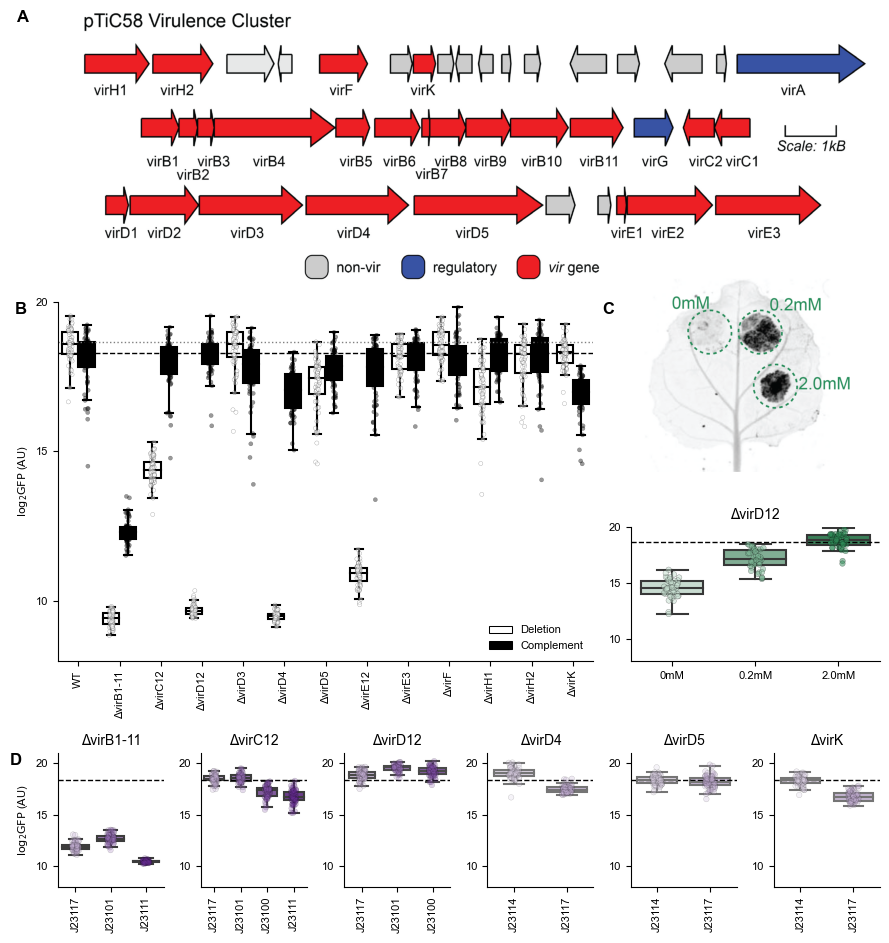

In [42]:
fig = plt.figure(tight_layout=True,figsize=(9,10))

gs1 = gridspec.GridSpec(9,12,hspace=-0.5,wspace=0)
gs2 = gridspec.GridSpec(9,12,hspace=0.1,wspace=0)
gs = gridspec.GridSpec(9,12)

a_gs = fig.add_subplot(gs1[0:3, :])
b_gs = fig.add_subplot(gs[3:7, :8])
c_gs = fig.add_subplot(gs2[3:5, 8:])
d_gs = fig.add_subplot(gs[5:7, 8:])

ei_gs = fig.add_subplot(gs[7:9, 0:2])
eii_gs = fig.add_subplot(gs[7:9, 2:4])
eiii_gs = fig.add_subplot(gs[7:9, 4:6])
eiv_gs = fig.add_subplot(gs[7:9, 6:8])
ev_gs = fig.add_subplot(gs[7:9, 8:10])
evi_gs = fig.add_subplot(gs[7:9, 10:12])

# ============== A ============
a_gs.annotate(f'A', xy=(-0.05, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
a_gs.imshow(plt.imread('clusters.png')[:-50,:],aspect='equal')
a_gs.axis('off')

# ============== B ============
b_gs.annotate(f'B', xy=(-0.08, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
dfko = pd.read_excel('2022.5.30 vir KO mitch.xlsx',sheet_name='data')
dfko['GFP_log'] = dfko.GFP.apply(np.log2)
dfko = dfko.dropna()
dfkosum=rp.summary_cont(dfko['GFP'].groupby(dfko['Strain']))
compko = mc.MultiComparison(dfko['GFP'], dfko['Strain'])
tblko, a1ko, a2ko = compko.allpairtest(stats.ttest_ind, method= "bonf")
dfko_virb=dfko[dfko.Strain.isin(['WT', 'ΔvirB1-11', 'ΔvirC12', 'ΔvirD12',
       'ΔvirD3', 'ΔvirD4', 'ΔvirD5', 'ΔvirE12', 'ΔvirE3', 'ΔvirF',
       'ΔvirH1', 'ΔvirH2', 'ΔvirK'])].copy()
kosiglist=['WT','ΔvirD3', 'ΔvirF']
df117comp = pd.read_excel('2022.8.8 con 117 tobacco mitch.xlsx',sheet_name='data')
df117comp['GFP_log'] = df117comp.GFP.apply(np.log2)
df117comp = df117comp.dropna()
df117compsum=rp.summary_cont(df117comp['GFP'].groupby(df117comp['Strain']))
comp117 = mc.MultiComparison(df117comp['GFP'], df117comp['Strain'])
tbl117, a1117, a2117 = comp117.allpairtest(stats.ttest_ind, method= "bonf")
ko117siglist=['WT', 'ΔvirC12', 'ΔvirD12', 'ΔvirD3', 'ΔvirE12', 'ΔvirE3', 'ΔvirF', 'ΔvirH1','ΔvirH2']
df117comp_b = df117comp[df117comp.Strain.isin(['WT', 'ΔvirB1-11', 'ΔvirC12', 'ΔvirD12',
       'ΔvirD3', 'ΔvirD4', 'ΔvirD5', 'ΔvirE12', 'ΔvirE3', 'ΔvirF','ΔvirH1', 'ΔvirH2', 'ΔvirK'])].copy()
dfko_virb['data'] = 'Deletion'
df117comp_b['data'] = 'Complement'
df_ko_comp = pd.concat([dfko_virb,df117comp_b])

g = sns.boxplot(data=df_ko_comp,x='Strain',y='GFP_log',hue='data',showfliers=False,palette=['white','black'],ax=b_gs)
x = sns.stripplot(data=df_ko_comp,x='Strain',y='GFP_log',hue='data',edgecolor='black',dodge=True,linewidth=0.25,size=3,alpha=0.4,palette=['white','black'],ax=b_gs)
b_gs.axhline(y = np.log2(319949.3438), color = 'black', linestyle = 'dashed',linewidth=1) #117 compe line 319949.3438
b_gs.axhline(y = np.log2(408382.4375), color = 'grey', linestyle = 'dotted',linewidth=1) #wt comp line 408382.4375
h,l = g.get_legend_handles_labels()
g.legend(h[:2],l[:2])
g.legend_.set_title(None)
g.legend_.set_frame_on(False)
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')
g.set_ylim(bottom=8,top=20)
b_gs.tick_params(axis='x', rotation=90)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
sns.despine()

# ============== C ============
c_gs.annotate(f'C', xy=(-0.15, 0.86), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
ax = c_gs.imshow(plt.imread(f'leaf_2.png'),aspect='equal')
c_gs.axis('off')

# ============== D ============

#complement with B1S data
df = pd.read_excel('2022.6.6 bis comps 1.xlsx',sheet_name='data')
df['GFP_log'] = df.GFP.apply(np.log2)
df['ID'] = df.Strain + "_" + df.Induction
df2 = pd.read_excel('2022.6.13 bis comps 2.xlsx',sheet_name='data')
df2 = df2[df2.Strain != "Empty"]
df2['GFP_log'] = df2.GFP.apply(np.log2)
df2['ID'] = df2.Strain + "_" + df2.Induction
dfB1S=pd.concat([df,df2])
dfB1S.replace(to_replace="2mM",value="2.0mM",inplace=True)
dfB1Ssum=rp.summary_cont(dfB1S['GFP'].groupby(dfB1S['ID']))
dfB1S_plot = dfB1S[dfB1S.Strain.isin(['ΔvirB1-5', 'ΔvirB6-11', 'ΔvirC12', 'ΔvirD12', 'ΔvirE12',
       'ΔvirD3', 'ΔvirD4', 'ΔvirD5', 'ΔvirE3', 'ΔvirF', 'ΔvirH1',
       'ΔvirH2', 'ΔvirK'])]

temp_df = dfB1S_plot[dfB1S_plot.Strain == 'ΔvirD12']
g = sns.boxplot(x="Induction", y="GFP_log", data=temp_df,palette=greens,width=.75,showfliers=False,ax=d_gs)
sns.stripplot(x="Induction", y="GFP_log", data=temp_df,size=4, edgecolor='black',linewidth=0.25,palette=greens,alpha=.5,ax=d_gs)
sns.despine()
d_gs.axhline(y = np.log2(420344.7875), color = 'black', linestyle = 'dashed',linewidth=1)
g.set_ylim(bottom=8,top=20)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
g.set(xlabel=None,ylabel=None,title='ΔvirD12')
g.set_title(label='ΔvirD12',fontsize=10)

# ============== E ============

ei_gs.annotate(f'D', xy=(-0.45, 1.0), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')

pal = {'J23114': (0.858422439141431, 0.8164846308958287, 0.8930328741149209),
 'J23117': (0.7716063172825682, 0.6908716107580088, 0.8340745737231835),
 'J23101': (0.5979740735648429, 0.4396455704823693, 0.7161579729397085),
 'J23100': (0.5111579517059802, 0.31403255034454947, 0.6571996725479711),
 'J23111': (0.42434182984711755, 0.18841953020672964, 0.5982413721562336)}


dfcomp2 = pd.read_excel('2022-12-12_pFreya.xlsx',sheet_name='virb_con')
dfcomp2['GFP_log'] = dfcomp2.GFP.apply(np.log2)
dfcomp2['Promoter'] = dfcomp2['Promoter'].apply(lambda x: x.replace('p','J23'))
temp_df = dfcomp2[dfcomp2.Strain == 'ΔvirB1-11']
g = sns.boxplot(x="Promoter", y="GFP_log", data=temp_df,width=.75,showfliers=False,palette=pal,ax=ei_gs)
sns.stripplot(x="Promoter", y="GFP_log", data=temp_df,size=4, edgecolor='black',linewidth=0.25,palette=pal,alpha=.25,ax=ei_gs)
sns.despine()
g.set_ylim(bottom=8,top=21)
g.tick_params(axis='x', rotation=90)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
ei_gs.axhline(y = np.log2(333645.8594), color = 'black', linestyle = 'dashed',linewidth=1)    
g.set(xlabel=None,ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')
g.set_title(label='ΔvirB1-11',fontsize=10)

dfcomp2 = pd.read_excel('2022.9.19 con comp.xlsx',sheet_name='data')
dfcomp2['GFP_log'] = dfcomp2.GFP.apply(np.log2)
dfcomp2['Promoter'] = dfcomp2['Promoter'].apply(lambda x: x.replace('p','J23'))

temp_df = dfcomp2[dfcomp2.Strain == 'ΔvirC12']
g = sns.boxplot(x="Promoter", y="GFP_log", data=temp_df,width=.75,showfliers=False,palette=pal,ax=eii_gs)
sns.stripplot(x="Promoter", y="GFP_log", data=temp_df,size=4, edgecolor='black',linewidth=0.25,palette=pal,alpha=.25,ax=eii_gs)
# g.set(yticklabels=[])  
g.tick_params(axis='x', rotation=90)
g.set_ylim(8,21)
eii_gs.axhline(y = np.log2(333645.8594), color = 'black', linestyle = 'dashed', linewidth=1)    
g.set(title='ΔvirC12',xlabel=None,ylabel=None)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
g.set_title(label='ΔvirC12',fontsize=10)

temp_df = dfcomp2[dfcomp2.Strain == 'ΔvirD12']
g = sns.boxplot(x="Promoter", y="GFP_log", data=temp_df,width=.75,showfliers=False,palette=pal,ax=eiii_gs)
sns.stripplot(x="Promoter", y="GFP_log", data=temp_df,size=4, edgecolor='black',linewidth=0.25,palette=pal,alpha=.25,ax=eiii_gs)
sns.despine()
# g.set(yticklabels=[])  
g.tick_params(axis='x', rotation=90)
g.set_ylim(8,21)
eiii_gs.axhline(y = np.log2(333645.8594), color = 'black', linestyle = 'dashed', linewidth=1)    
g.set(title='ΔvirD12',xlabel=None,ylabel=None)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
g.set_title(label='ΔvirD12',fontsize=10)

temp_df = dfcomp2[dfcomp2.Strain == 'ΔvirD4']
g = sns.boxplot(x="Promoter", y="GFP_log", data=temp_df,width=.75,showfliers=False,palette=pal,ax=eiv_gs)
sns.stripplot(x="Promoter", y="GFP_log", data=temp_df,size=4, edgecolor='black',linewidth=0.25,palette=pal,alpha=.25,ax=eiv_gs)
sns.despine()
# g.set(yticklabels=[])  
g.tick_params(axis='x', rotation=90)
g.set_ylim(8,21)
eiv_gs.axhline(y = np.log2(333645.8594), color = 'black', linestyle = 'dashed', linewidth=1)    
g.set(title='ΔvirD4',xlabel=None,ylabel=None)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
g.set_title(label='ΔvirD4',fontsize=10)

temp_df = dfcomp2[dfcomp2.Strain == 'ΔvirD5']
g = sns.boxplot(x="Promoter", y="GFP_log", data=temp_df,width=.75,showfliers=False,palette=pal,ax=ev_gs)
sns.stripplot(x="Promoter", y="GFP_log", data=temp_df,size=4, edgecolor='black',linewidth=0.25,palette=pal,alpha=.25,ax=ev_gs)
sns.despine()
# g.set(yticklabels=[])  
g.tick_params(axis='x', rotation=90)
g.set_ylim(8,21)
ev_gs.axhline(y = np.log2(333645.8594), color = 'black', linestyle = 'dashed', linewidth=1)    
g.set(title='ΔvirD5',xlabel=None,ylabel=None)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
g.set_title(label='ΔvirD5',fontsize=10)

temp_df = dfcomp2[dfcomp2.Strain == 'ΔvirK']
g = sns.boxplot(x="Promoter", y="GFP_log", data=temp_df,width=.75,showfliers=False,palette=pal,ax=evi_gs)
sns.stripplot(x="Promoter", y="GFP_log", data=temp_df,size=4, edgecolor='black',linewidth=0.25,palette=pal,alpha=.25,ax=evi_gs)
sns.despine()
g.tick_params(axis='x', rotation=90)
g.set_ylim(8,21)
evi_gs.axhline(y = np.log2(333645.8594), color = 'black', linestyle = 'dashed', linewidth=1)    
g.set(title='ΔvirK',xlabel=None,ylabel=None)
g.set_title(label='ΔvirK',fontsize=10)
g.yaxis.set_major_locator(ticker.MultipleLocator(5))
# g.set(yticklabels=[])  

fig.savefig(f'fig2.png',dpi=600,transparent=False,bbox_inches='tight')
fig.savefig(f'fig2.pdf',dpi=600,transparent=False,bbox_inches='tight')
plt.show()

In [37]:
greens

['#c5decf', '#7ab493', '#2e8b57']

In [6]:
df117comp = pd.read_excel('2022.8.8 con 117 tobacco.xlsx',sheet_name='data')
df117comp['GFP_log'] = df117comp.GFP.apply(np.log2)
df117comp.Strain.unique()
# df117comp = df117comp.dropna()
# df117compsum=rp.summary_cont(df117comp['GFP'].groupby(df117comp['Strain']))
# comp117 = mc.MultiComparison(df117comp['GFP'], df117comp['Strain'])
# tbl117, a1117, a2117 = comp117.allpairtest(stats.ttest_ind, method= "bonf")
# ko117siglist=['WT', 'ΔvirC12', 'ΔvirD12', 'ΔvirD3', 'ΔvirE12', 'ΔvirE3', 'ΔvirF', 'ΔvirH1','ΔvirH2']
# df117comp_b = df117comp[df117comp.Strain.isin(['WT', 'ΔvirB1-11', 'ΔvirC12', 'ΔvirD12',
#        'ΔvirD3', 'ΔvirD4', 'ΔvirD5', 'ΔvirE12', 'ΔvirE3', 'ΔvirF','ΔvirH1', 'ΔvirH2', 'ΔvirK'])].copy()
# dfko_virb['data'] = 'Deletion'
# df117comp_b['data'] = 'Complement'
# df_ko_comp = pd.concat([dfko_virb,df117comp_b])

array(['WT', 'ΔvirB1-5', 'ΔvirB6-11', 'ΔvirC12', 'ΔvirD12', 'ΔvirD3',
       'ΔvirD4', 'ΔvirD5', 'ΔvirE12', 'ΔvirE3', 'ΔvirF', 'ΔvirH1',
       'ΔvirH2', 'ΔvirK'], dtype=object)

# figure 3





/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:107: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:107: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:107: FutureWarning: Passing `palette` without assig

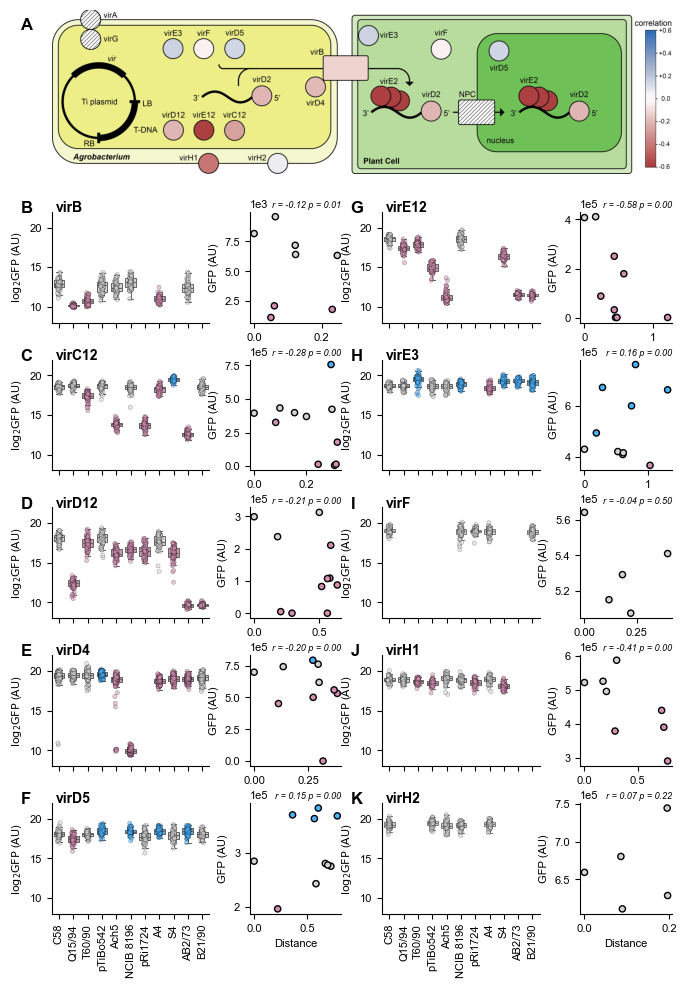

In [7]:
alleles = ['A4', 'Ach5', 'C58', 'NCIB', 'Q15', 'TiAB', 'TiBo', 'T60', 'B21','pRi', 'S4']

allele_map = {'A4':'A4', 
 'Ach5':'Ach5', 
 'B21':'B21/90', 
 'C58':'C58', 
 'NCIB':'NCIB 8196', 
 'Q15':'Q15/94', 
 'pRi':'pRi1724', 
 'S4':'S4',
 'T60':'T60/90', 
 'TiAB':'AB2/73', 
 'TiBo':'pTiBo542'
 }

allele_order = ['C58','Q15/94','T60/90','pTiBo542','Ach5','NCIB 8196','pRi1724','A4','S4','AB2/73','B21/90']

fig = plt.figure(figsize=(8,12))
gs1 = gridspec.GridSpec(13,10,hspace=.2,wspace=0)
gs = gridspec.GridSpec(13,10,hspace=1,wspace=1.6)

anno_opts = dict(xy=(1, 1.1), xycoords='axes fraction',va='top', ha='right',style='italic')

a_gs = fig.add_subplot(gs1[0:3, :])
bi_gs = fig.add_subplot(gs[3:5, 0:3])
bii_gs = fig.add_subplot(gs[3:5, 3:5])
ci_gs = fig.add_subplot(gs[5:7, 0:3])
cii_gs = fig.add_subplot(gs[5:7, 3:5])
di_gs = fig.add_subplot(gs[7:9, 0:3])
dii_gs = fig.add_subplot(gs[7:9, 3:5])
ei_gs = fig.add_subplot(gs[9:11, 0:3])
eii_gs = fig.add_subplot(gs[9:11, 3:5])
fi_gs = fig.add_subplot(gs[11:13, 0:3])
fii_gs = fig.add_subplot(gs[11:13, 3:5])
gi_gs = fig.add_subplot(gs[3:5, 5:8])
gii_gs = fig.add_subplot(gs[3:5, 8:10])
hi_gs = fig.add_subplot(gs[5:7, 5:8])
hii_gs = fig.add_subplot(gs[5:7, 8:10])
ii_gs = fig.add_subplot(gs[7:9, 5:8])
iii_gs = fig.add_subplot(gs[7:9, 8:10])
ji_gs = fig.add_subplot(gs[9:11, 5:8])
jii_gs = fig.add_subplot(gs[9:11, 8:10])
ki_gs = fig.add_subplot(gs[11:13, 5:8])
kii_gs = fig.add_subplot(gs[11:13, 8:10])

virB_df = pd.read_excel('2023.2.6 virB allele.xlsx',sheet_name='data')
# virB_df = virB_df[virB_df.Strain.isin(['A4','Ach5', 'C58', 'NCIB', 'Q15', 'TiAB','T60', 'TiBo'])]
virB_df['vir'] = 'virB'
virC_df = pd.read_excel('2022.9.5 virC12 alleles.xlsx',sheet_name='data')
# virC_df = virC_df[virC_df.Strain.isin(['A4', 'Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'pRi', 'S4','T60', 'TiAB', 'TiBo'])]
virC_df['vir'] = 'virC'
virD12_df = pd.read_excel('2022.7.25 virD allele.xlsx',sheet_name='data')
# virD12_df = virD12_df[virD12_df.Strain.isin(['A4', 'Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'pRi', 'S4','T60', 'TiAB', 'TiBo'])]
virD12_df['vir'] = 'virD12'
virD4_df = pd.read_excel('2022.10.17 vird4 allle.xlsx',sheet_name='data')
# virD4_df = virD4_df[virD4_df.Strain.isin(['A4','Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4','T60', 'TiAB', 'TiBo'])]
virD4_df['vir'] = 'virD4'
virD5_df = pd.read_excel('2022.11.7 virD5 virE3 alleles.xlsx',sheet_name='virD5_data')
# virD5_df = virD5_df[virD5_df.Strain.isin(['A4', 'B21', 'C58', 'NCIB', 'Q15', 'S4','pRi','T60', 'TiAB', 'TiBo'])]
virD5_df['vir'] = 'virD5'
virE12_df = pd.read_excel('2022.9.12 virE12 allele.xlsx',sheet_name='data')
# virE12_df = virE12_df[virE12_df.Strain.isin(['Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4','T60', 'TiAB', 'TiBo'])]
virE12_df['vir'] = 'virE12'
virE3_df = pd.read_excel('2022.11.7 virD5 virE3 alleles.xlsx',sheet_name='virE3_data')
# virE3_df = virE3_df[virE3_df.Strain.isin(['A4','Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4','T60', 'TiAB', 'TiBo'])]
virE3_df['vir'] = 'virE3'
virF_df = pd.read_excel('2022.12.5 virF virH1.xlsx',sheet_name='dataF')
# virF_df = virF_df[virF_df.Strain.isin(['A4', 'B21', 'C58', 'NCIB'])]
virF_df['vir'] = 'virF'
virH1_df = pd.read_excel('2022.12.5 virF virH1.xlsx',sheet_name='dataH1')
# virH1_df = virH1_df[virH1_df.Strain.isin(['A4','Ach5', 'C58', 'NCIB', 'Q15', 'S4','pRi','T60', 'TiBo'])]
virH1_df['vir'] = 'virH1'
virH2_df = pd.read_excel('2023.1.9 virH2 allele virH12 comp.xlsx',sheet_name='data')
# virH2_df = virH2_df[virH2_df.Strain.isin(['A4','Ach5', 'C58', 'NCIB','TiBo'])]
virH2_df['vir'] = 'virH2'

df = pd.concat([
    virB_df,
    virC_df,
    virD12_df,
    virD4_df,
    virD5_df,
    virE12_df,
    virE3_df,
    virF_df,
    virH1_df,
    virH2_df
]).reset_index(drop=True).drop(columns=['Reader','GFP_non'])
df.to_pickle('fig3_plant_data.pkl')
df_dist_compare = pd.read_csv('../../04-plasmids/df_dist_compare_fixed.csv')

cluster_corr = {}
def plot_allele(fig_letter,allele_name,palette,plant_df,plant_ax,allele_df,allele_ax,hide_x=False):
    plant_ax.annotate(fig_letter, xy=(-0.2, 1.1), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
    plant_ax.annotate(allele_name, xy=(0.025, 1.1), xycoords='axes fraction',va='top', ha='left',size=10,weight='bold')
    plant_df = plant_df[plant_df.Strain.isin(alleles)].copy()
    missing_alleles = [allele for allele in alleles if allele not in plant_df['Strain'].unique()] 
    plant_df = plant_df.copy()
    for missing_allele in missing_alleles:
        temp_df = pd.DataFrame(data = [[None,0,missing_allele,None,None,allele_name]],columns=['Well', 'GFP', 'Strain', 'Plant', 'Leaf', 'vir'])
        plant_df = pd.concat([plant_df, temp_df])
    plant_df['GFP_log'] = plant_df.GFP.apply(np.log2)
    palette.update({allele:'lightgrey' for allele in alleles if allele not in palette})
    palette = {allele_map[k]:v for k,v in palette.items()}
    plant_df['Strain'] = plant_df['Strain'].map(allele_map)
    g = sns.boxplot(x="Strain",y="GFP_log",data=plant_df,palette=palette,order=allele_order,width=0.75,linewidth=0.75,showfliers=False,ax=plant_ax)
    sns.stripplot(x="Strain",y="GFP_log",data=plant_df,size=3,palette=palette,order=allele_order,edgecolor='black',linewidth=0.25,color='grey',alpha=.5,ax=plant_ax)
    sns.despine()
    g.set(ylabel='$\mathrm{log_{2}{GFP}}$ (AU)',xlabel=None)
    if hide_x:
        g.set(xticklabels=[])
    else:
        g.set_xticklabels(g.get_xticklabels(), rotation=90)


    g.yaxis.set_major_locator(ticker.MultipleLocator(5))
    g.set_ylim(bottom=8,top=22)
    allele_df = allele_df.copy()
    allele_df['allele'] = allele_df['allele'].map(allele_map)
    grouped_df = allele_df.groupby(['cluster','allele']).mean().reset_index().copy()
    g = sns.scatterplot(data=grouped_df,x='dist',y='GFP',linewidth=1,palette=palette,hue='allele',edgecolor='black',ax=allele_ax,s=20)
    allele_ax.ticklabel_format(style='sci', axis='y',scilimits=(0, 0))    
    g.legend().remove()
#     g.yaxis.set_major_locator(ticker.MultipleLocator(5))
#     g.set_ylim(bottom=8,top=22)
    pearson = scipy.stats.pearsonr(allele_df.dist,allele_df.GFP)
    correlation, pvalue = pearson
    if hide_x:
        g.set(xlabel=None,ylabel='GFP (AU)')
    else:
        g.set(xlabel='Distance',ylabel='GFP (AU)')

    # if pearson.pvalue < 0.01:
    #     allele_ax.annotate(f'r = {pearson.statistic:.2f} p = {pearson.pvalue:.2g}', **anno_opts,size=6.5)
    # else:
    #     allele_ax.annotate(f'r = {pearson.statistic:.2f} p = {pearson.pvalue:.2f}', **anno_opts,size=6.5)
    allele_ax.annotate(f'r = {correlation:.2f} p = {pvalue:.2f}', **anno_opts,size=6.5)
    cluster_corr[allele_name] = correlation
    sns.despine()

#     x = set(plant_df['Strain'].unique()).symmetric_difference(set(allele_df['allele'].unique()))
#     print(allele_name,len(plant_df['Strain'].unique()),len(allele_df['allele'].unique()))

    return None

# ============== A ============
a_gs.annotate(f'A', xy=(-0.05, 0.95), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
a_gs.imshow(plt.imread(f'eLW011_diagram_v2.png'),aspect='equal')
a_gs.axis('off')

# ============== B ============

plot_allele(fig_letter='B',
            allele_name='virB',
            palette={'A4': pink,
                     'Ach5': 'lightgrey',
                     'Q15': pink,
                     'T60':pink,
                     'TiAB':'lightgrey',
                     'C58': 'lightgrey',
                     'NCIB': 'lightgrey',
                     'TiBo': 'lightgrey'},
            plant_df=df.query('vir == "virB"'),
            plant_ax=bi_gs,
            allele_df=df_dist_compare.query(f'cluster == "virB4"'),
            allele_ax=bii_gs,
            hide_x=True
            )

plot_allele(fig_letter='C',
            allele_name='virC12',
            palette={'A4': pink,
                    'Ach5': pink,
                    'B21': 'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey',
                    'Q15': 'lightgrey',
                    'pRi': pink,
                    'S4': blue,
                    'T60': pink,
                    'TiAB': pink,
                    'TiBo': 'lightgrey'},
            plant_df=df.query('vir == "virC"'),
            plant_ax=ci_gs,
            allele_df=df_dist_compare.query(f'cluster == "virC12"'),
            allele_ax=cii_gs,
            hide_x=True
            )

plot_allele(fig_letter='D',
            allele_name='virD12',
            palette={'A4': 'lightgrey',
                    'Ach5': pink,
                    'B21': pink,
                    'C58': 'lightgrey',
                    'NCIB': pink,
                    'Q15': pink,
                    'pRi': pink,
                    'S4': pink,
                    'T60': pink,
                    'TiAB': pink,
                    'TiBo': 'lightgrey'},
            plant_df=df.query('vir == "virD12"'),
            plant_ax=di_gs,
            allele_df=df_dist_compare.query(f'cluster == "virD12"'),
            allele_ax=dii_gs,
            hide_x=True
            )

plot_allele(fig_letter='E',
            allele_name='virD4',
            palette={'A4':pink,
                    'Ach5': pink,
                    'B21': 'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': pink,
                    'Q15': 'lightgrey',
                    'S4': pink,
                    'T60': 'lightgrey',
                    'TiAB': pink,
                    'TiBo': blue},
            plant_df=df.query('vir == "virD4"'),
            plant_ax=ei_gs,
            allele_df=df_dist_compare.query(f'cluster == "virD4"'),
            allele_ax=eii_gs,
            hide_x=True
            )

plot_allele(fig_letter='F',
            allele_name='virD5',
            palette={'A4':blue,
                    'B21': 'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': blue,
                    'Q15': pink,
                    'S4': 'lightgrey',
                    'T60': 'lightgrey',
                    'TiAB': blue,
                    'TiBo': blue,
                    'pRi':'lightgrey'},
            plant_df=df.query('vir == "virD5"'),
            plant_ax=fi_gs,
            allele_df=df_dist_compare.query(f'cluster == "virD5"'),
            allele_ax=fii_gs,
            hide_x=False
            )

plot_allele(fig_letter='G',
            allele_name='virE12',
            palette={'Ach5': pink,
                    'B21': pink,
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey',
                    'Q15': pink,
                    'S4': pink,
                    'T60': pink,
                    'TiAB': pink,
                    'TiBo': pink},
            plant_df=df.query('vir == "virE12"'),
            plant_ax=gi_gs,
            allele_df=df_dist_compare.query(f'cluster == "virE12"'),
            allele_ax=gii_gs,
            hide_x=True
            )

plot_allele(fig_letter='H',
            allele_name='virE3',
            palette={'A4':pink,
                    'B21': blue,
                    'C58': 'lightgrey',
                    'NCIB': blue,
                    'Q15': 'lightgrey',
                    'S4': blue,
                    'T60': blue,
                    'TiAB': blue,
                    'TiBo': 'lightgrey',
                    'Ach5':'lightgrey'},
            plant_df=df.query('vir == "virE3"'),
            plant_ax=hi_gs,
            allele_df=df_dist_compare.query(f'cluster == "virE3"'),
            allele_ax=hii_gs,
            hide_x=True
            )

plot_allele(fig_letter='I',
            allele_name='virF',
            palette={'A4':'lightgrey',
                    'B21': 'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey'},
            plant_df=df.query('vir == "virF"'),
            plant_ax=ii_gs,
            allele_df=df_dist_compare.query(f'cluster == "virF"'),
            allele_ax=iii_gs,
            hide_x=True
            )

plot_allele(fig_letter='J',
            allele_name='virH1',
            palette={'A4':'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey',
                    'Q15': 'lightgrey',
                    'S4': pink,
                    'T60': pink,
                    'pRi': pink,
                    'TiBo': pink,
                    'Ach5':'lightgrey'},
            plant_df=df.query('vir == "virH1"'),
            plant_ax=ji_gs,
            allele_df=df_dist_compare.query(f'cluster == "virH1"'),
            allele_ax=jii_gs,
            hide_x=True
            )

plot_allele(fig_letter='K',
            allele_name='virH2',
            palette={'A4':'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey',
                    'TiBo': 'lightgrey',
                    'Ach5':'lightgrey'},
            plant_df=df.query('vir == "virH2"'),
            plant_ax=ki_gs,
            allele_df=df_dist_compare.query(f'cluster == "virH2"'),
            allele_ax=kii_gs,
            hide_x=False
            )

fig.savefig('fig3.png',dpi=600,facecolor='white',bbox_inches='tight')
fig.savefig(f'fig3.pdf',dpi=600,transparent=False,bbox_inches='tight')
plt.show()

In [8]:
# alleles = ['A4', 'Ach5', 'C58', 'NCIB', 'Q15', 'TiAB', 'TiBo', 'T60', 'B21','pRi', 'S4']

# allele_map = {'A4':'A4', 
#  'Ach5':'Ach5', 
#  'B21':'B21/90', 
#  'C58':'C58', 
#  'NCIB':'NCIB 8196', 
#  'Q15':'Q15/94', 
#  'pRi':'pRi1724', 
#  'S4':'S4',
#  'T60':'T60/90', 
#  'TiAB':'AB2/73', 
#  'TiBo':'pTiBo542'
#  }

# allele_order = ['C58','Q15/94','T60/90','pTiBo542','Ach5','NCIB 8196','pRi1724','A4','S4','AB2/73','B21/90']

# fig = plt.figure(figsize=(10,14))
# gs1 = gridspec.GridSpec(13,10,hspace=.2,wspace=0)
# gs = gridspec.GridSpec(13,10,hspace=1,wspace=1.4)

# anno_opts = dict(xy=(1, 1.1), xycoords='axes fraction',va='top', ha='right',style='italic')

# a_gs = fig.add_subplot(gs1[0:3, :])
# bi_gs = fig.add_subplot(gs[3:5, 0:3])
# bii_gs = fig.add_subplot(gs[3:5, 3:5])
# ci_gs = fig.add_subplot(gs[5:7, 0:3])
# cii_gs = fig.add_subplot(gs[5:7, 3:5])
# di_gs = fig.add_subplot(gs[7:9, 0:3])
# dii_gs = fig.add_subplot(gs[7:9, 3:5])
# ei_gs = fig.add_subplot(gs[9:11, 0:3])
# eii_gs = fig.add_subplot(gs[9:11, 3:5])
# fi_gs = fig.add_subplot(gs[11:13, 0:3])
# fii_gs = fig.add_subplot(gs[11:13, 3:5])
# gi_gs = fig.add_subplot(gs[3:5, 5:8])
# gii_gs = fig.add_subplot(gs[3:5, 8:10])
# hi_gs = fig.add_subplot(gs[5:7, 5:8])
# hii_gs = fig.add_subplot(gs[5:7, 8:10])
# ii_gs = fig.add_subplot(gs[7:9, 5:8])
# iii_gs = fig.add_subplot(gs[7:9, 8:10])
# ji_gs = fig.add_subplot(gs[9:11, 5:8])
# jii_gs = fig.add_subplot(gs[9:11, 8:10])
# ki_gs = fig.add_subplot(gs[11:13, 5:8])
# kii_gs = fig.add_subplot(gs[11:13, 8:10])

# virB_df = pd.read_excel('2023.2.6 virB allele.xlsx',sheet_name='data')
# # virB_df = virB_df[virB_df.Strain.isin(['A4','Ach5', 'C58', 'NCIB', 'Q15', 'TiAB','T60', 'TiBo'])]
# virB_df['vir'] = 'virB'
# virC_df = pd.read_excel('2022.9.5 virC12 alleles.xlsx',sheet_name='data')
# # virC_df = virC_df[virC_df.Strain.isin(['A4', 'Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'pRi', 'S4','T60', 'TiAB', 'TiBo'])]
# virC_df['vir'] = 'virC'
# virD12_df = pd.read_excel('2022.7.25 virD allele.xlsx',sheet_name='data')
# # virD12_df = virD12_df[virD12_df.Strain.isin(['A4', 'Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'pRi', 'S4','T60', 'TiAB', 'TiBo'])]
# virD12_df['vir'] = 'virD12'
# virD4_df = pd.read_excel('2022.10.17 vird4 allle.xlsx',sheet_name='data')
# # virD4_df = virD4_df[virD4_df.Strain.isin(['A4','Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4','T60', 'TiAB', 'TiBo'])]
# virD4_df['vir'] = 'virD4'
# virD5_df = pd.read_excel('2022.11.7 virD5 virE3 alleles.xlsx',sheet_name='virD5_data')
# # virD5_df = virD5_df[virD5_df.Strain.isin(['A4', 'B21', 'C58', 'NCIB', 'Q15', 'S4','pRi','T60', 'TiAB', 'TiBo'])]
# virD5_df['vir'] = 'virD5'
# virE12_df = pd.read_excel('2022.9.12 virE12 allele.xlsx',sheet_name='data')
# # virE12_df = virE12_df[virE12_df.Strain.isin(['Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4','T60', 'TiAB', 'TiBo'])]
# virE12_df['vir'] = 'virE12'
# virE3_df = pd.read_excel('2022.11.7 virD5 virE3 alleles.xlsx',sheet_name='virE3_data')
# # virE3_df = virE3_df[virE3_df.Strain.isin(['A4','Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4','T60', 'TiAB', 'TiBo'])]
# virE3_df['vir'] = 'virE3'
# virF_df = pd.read_excel('2022.12.5 virF virH1.xlsx',sheet_name='dataF')
# # virF_df = virF_df[virF_df.Strain.isin(['A4', 'B21', 'C58', 'NCIB'])]
# virF_df['vir'] = 'virF'
# virH1_df = pd.read_excel('2022.12.5 virF virH1.xlsx',sheet_name='dataH1')
# # virH1_df = virH1_df[virH1_df.Strain.isin(['A4','Ach5', 'C58', 'NCIB', 'Q15', 'S4','pRi','T60', 'TiBo'])]
# virH1_df['vir'] = 'virH1'
# virH2_df = pd.read_excel('2023.1.9 virH2 allele virH12 comp.xlsx',sheet_name='data')
# # virH2_df = virH2_df[virH2_df.Strain.isin(['A4','Ach5', 'C58', 'NCIB','TiBo'])]
# virH2_df['vir'] = 'virH2'

# df = pd.concat([
#     virB_df,
#     virC_df,
#     virD12_df,
#     virD4_df,
#     virD5_df,
#     virE12_df,
#     virE3_df,
#     virF_df,
#     virH1_df,
#     virH2_df
# ]).reset_index(drop=True).drop(columns=['Reader','GFP_non'])
# df.to_pickle('fig3_plant_data.pkl')
# df_dist_compare = pd.read_pickle('../../04-plasmids/df_dist_compare_fixed.pkl')

# def plot_allele(fig_letter,allele_name,palette,plant_df,plant_ax,allele_df,allele_ax,hide_x=False):
#     plant_ax.annotate(fig_letter, xy=(-0.2, 1.1), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
#     plant_ax.annotate(allele_name, xy=(0.025, 1.1), xycoords='axes fraction',va='top', ha='left',size=10,weight='bold')
#     plant_df = plant_df[plant_df.Strain.isin(alleles)].copy()
#     missing_alleles = [allele for allele in alleles if allele not in plant_df['Strain'].unique()] 
#     plant_df = plant_df.copy()
#     for missing_allele in missing_alleles:
#         temp_df = pd.DataFrame(data = [[None,0,missing_allele,None,None,allele_name]],columns=['Well', 'GFP', 'Strain', 'Plant', 'Leaf', 'vir'])
#         plant_df = pd.concat([plant_df, temp_df])
#     plant_df['GFP_log'] = plant_df.GFP.apply(np.log2)
#     palette.update({allele:'lightgrey' for allele in alleles if allele not in palette})
#     palette = {allele_map[k]:v for k,v in palette.items()}
#     plant_df['Strain'] = plant_df['Strain'].map(allele_map)
#     g = sns.boxplot(x="Strain",y="GFP_log",data=plant_df,palette=palette,order=allele_order,width=0.75,linewidth=0.75,showfliers=False,ax=plant_ax)
#     sns.stripplot(x="Strain",y="GFP_log",data=plant_df,size=3,palette=palette,order=allele_order,edgecolor='black',linewidth=0.25,color='grey',alpha=.5,ax=plant_ax)
#     sns.despine()
#     g.set(ylabel='$\mathrm{log_{2}{GFP}}$ (AU)',xlabel=None)
#     if hide_x:
#         g.set(xticklabels=[])
#     else:
#         g.set_xticklabels(g.get_xticklabels(), rotation=90)


#     g.yaxis.set_major_locator(ticker.MultipleLocator(5))
#     g.set_ylim(bottom=8,top=22)
#     allele_df = allele_df.copy()
#     allele_df['allele'] = allele_df['allele'].map(allele_map)
#     grouped_df = allele_df.groupby(['cluster','allele']).mean().reset_index().copy()
#     g = sns.scatterplot(data=grouped_df,x='dist',y='GFP',linewidth=1,palette=palette,hue='allele',edgecolor='black',ax=allele_ax,s=20)
#     allele_ax.ticklabel_format(style='sci', axis='y',scilimits=(0, 0))    
#     g.legend().remove()
# #     g.yaxis.set_major_locator(ticker.MultipleLocator(5))
# #     g.set_ylim(bottom=8,top=22)
#     pearson = scipy.stats.pearsonr(allele_df.dist,allele_df.GFP)

#     if hide_x:
#         g.set(xlabel=None,ylabel='GFP (AU)')
#     else:
#         g.set(xlabel='Distance',ylabel='GFP (AU)')

#     # if pearson.pvalue < 0.01:
#     #     allele_ax.annotate(f'r = {pearson.statistic:.2f} p = {pearson.pvalue:.2g}', **anno_opts,size=6.5)
#     # else:
#     #     allele_ax.annotate(f'r = {pearson.statistic:.2f} p = {pearson.pvalue:.2f}', **anno_opts,size=6.5)
#     allele_ax.annotate(f'r = {pearson.statistic:.2f} p = {pearson.pvalue:.2f}', **anno_opts,size=8)

#     sns.despine()

# #     x = set(plant_df['Strain'].unique()).symmetric_difference(set(allele_df['allele'].unique()))
# #     print(allele_name,len(plant_df['Strain'].unique()),len(allele_df['allele'].unique()))

#     return None

# # ============== A ============
# a_gs.annotate(f'A', xy=(-0.05, 0.95), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
# a_gs.imshow(plt.imread(f'eLW011_diagram.png'),aspect='equal')
# a_gs.axis('off')

# # ============== B ============

# plot_allele(fig_letter='B',
#             allele_name='virB',
#             palette={'A4': pink,
#                      'Ach5': 'lightgrey',
#                      'Q15': pink,
#                      'T60':pink,
#                      'TiAB':'lightgrey',
#                      'C58': 'lightgrey',
#                      'NCIB': 'lightgrey',
#                      'TiBo': 'lightgrey'},
#             plant_df=df.query('vir == "virB"'),
#             plant_ax=bi_gs,
#             allele_df=df_dist_compare.query(f'cluster == "virB4"'),
#             allele_ax=bii_gs,
#             hide_x=True
#             )

# plot_allele(fig_letter='C',
#             allele_name='virC12',
#             palette={'A4': pink,
#                     'Ach5': pink,
#                     'B21': 'lightgrey',
#                     'C58': 'lightgrey',
#                     'NCIB': 'lightgrey',
#                     'Q15': 'lightgrey',
#                     'pRi': pink,
#                     'S4': blue,
#                     'T60': pink,
#                     'TiAB': pink,
#                     'TiBo': 'lightgrey'},
#             plant_df=df.query('vir == "virC"'),
#             plant_ax=ci_gs,
#             allele_df=df_dist_compare.query(f'cluster == "virC12"'),
#             allele_ax=cii_gs,
#             hide_x=True
#             )

# plot_allele(fig_letter='D',
#             allele_name='virD12',
#             palette={'A4': 'lightgrey',
#                     'Ach5': pink,
#                     'B21': pink,
#                     'C58': 'lightgrey',
#                     'NCIB': pink,
#                     'Q15': pink,
#                     'pRi': pink,
#                     'S4': pink,
#                     'T60': pink,
#                     'TiAB': pink,
#                     'TiBo': 'lightgrey'},
#             plant_df=df.query('vir == "virD12"'),
#             plant_ax=di_gs,
#             allele_df=df_dist_compare.query(f'cluster == "virD12"'),
#             allele_ax=dii_gs,
#             hide_x=True
#             )

# plot_allele(fig_letter='E',
#             allele_name='virD4',
#             palette={'A4':pink,
#                     'Ach5': pink,
#                     'B21': 'lightgrey',
#                     'C58': 'lightgrey',
#                     'NCIB': pink,
#                     'Q15': 'lightgrey',
#                     'S4': pink,
#                     'T60': 'lightgrey',
#                     'TiAB': pink,
#                     'TiBo': blue},
#             plant_df=df.query('vir == "virD4"'),
#             plant_ax=ei_gs,
#             allele_df=df_dist_compare.query(f'cluster == "virD4"'),
#             allele_ax=eii_gs,
#             hide_x=True
#             )

# plot_allele(fig_letter='F',
#             allele_name='virD5',
#             palette={'A4':blue,
#                     'B21': 'lightgrey',
#                     'C58': 'lightgrey',
#                     'NCIB': blue,
#                     'Q15': pink,
#                     'S4': 'lightgrey',
#                     'T60': 'lightgrey',
#                     'TiAB': blue,
#                     'TiBo': blue,
#                     'pRi':'lightgrey'},
#             plant_df=df.query('vir == "virD5"'),
#             plant_ax=fi_gs,
#             allele_df=df_dist_compare.query(f'cluster == "virD5"'),
#             allele_ax=fii_gs,
#             hide_x=False
#             )

# plot_allele(fig_letter='G',
#             allele_name='virE12',
#             palette={'Ach5': pink,
#                     'B21': pink,
#                     'C58': 'lightgrey',
#                     'NCIB': 'lightgrey',
#                     'Q15': pink,
#                     'S4': pink,
#                     'T60': pink,
#                     'TiAB': pink,
#                     'TiBo': pink},
#             plant_df=df.query('vir == "virE12"'),
#             plant_ax=gi_gs,
#             allele_df=df_dist_compare.query(f'cluster == "virE12"'),
#             allele_ax=gii_gs,
#             hide_x=True
#             )

# plot_allele(fig_letter='H',
#             allele_name='virE3',
#             palette={'A4':pink,
#                     'B21': blue,
#                     'C58': 'lightgrey',
#                     'NCIB': blue,
#                     'Q15': 'lightgrey',
#                     'S4': blue,
#                     'T60': blue,
#                     'TiAB': blue,
#                     'TiBo': 'lightgrey',
#                     'Ach5':'lightgrey'},
#             plant_df=df.query('vir == "virE3"'),
#             plant_ax=hi_gs,
#             allele_df=df_dist_compare.query(f'cluster == "virE3"'),
#             allele_ax=hii_gs,
#             hide_x=True
#             )

# plot_allele(fig_letter='I',
#             allele_name='virF',
#             palette={'A4':'lightgrey',
#                     'B21': 'lightgrey',
#                     'C58': 'lightgrey',
#                     'NCIB': 'lightgrey'},
#             plant_df=df.query('vir == "virF"'),
#             plant_ax=ii_gs,
#             allele_df=df_dist_compare.query(f'cluster == "virF"'),
#             allele_ax=iii_gs,
#             hide_x=True
#             )

# plot_allele(fig_letter='J',
#             allele_name='virH1',
#             palette={'A4':'lightgrey',
#                     'C58': 'lightgrey',
#                     'NCIB': 'lightgrey',
#                     'Q15': 'lightgrey',
#                     'S4': pink,
#                     'T60': pink,
#                     'pRi': pink,
#                     'TiBo': pink,
#                     'Ach5':'lightgrey'},
#             plant_df=df.query('vir == "virH1"'),
#             plant_ax=ji_gs,
#             allele_df=df_dist_compare.query(f'cluster == "virH1"'),
#             allele_ax=jii_gs,
#             hide_x=True
#             )

# plot_allele(fig_letter='K',
#             allele_name='virH2',
#             palette={'A4':'lightgrey',
#                     'C58': 'lightgrey',
#                     'NCIB': 'lightgrey',
#                     'TiBo': 'lightgrey',
#                     'Ach5':'lightgrey'},
#             plant_df=df.query('vir == "virH2"'),
#             plant_ax=ki_gs,
#             allele_df=df_dist_compare.query(f'cluster == "virH2"'),
#             allele_ax=kii_gs,
#             hide_x=False
#             )

# fig.savefig('fig3.png',dpi=600,facecolor='lightgrey',bbox_inches='tight')
# plt.show()

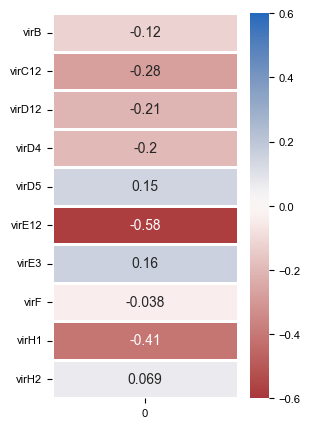

In [9]:
plt.figure(figsize=(3,5))
corr_df = pd.DataFrame([cluster_corr]).T
# corr_df.columns = ['cluster','correlation']
corr_df
g = sns.heatmap(data=corr_df,cmap="vlag_r",vmin=-.6, vmax=.6,annot=True,linewidth=1)
plt.xticks(None)
plt.yticks(rotation=0) 
plt.savefig('allele_correlations.svg',dpi=600)

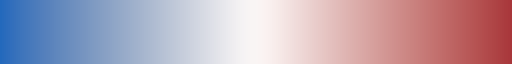

In [10]:
sns.color_palette("vlag", as_cmap=True)

# Remake figure for Monsieur Mitch

/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:97: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:98: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reductio

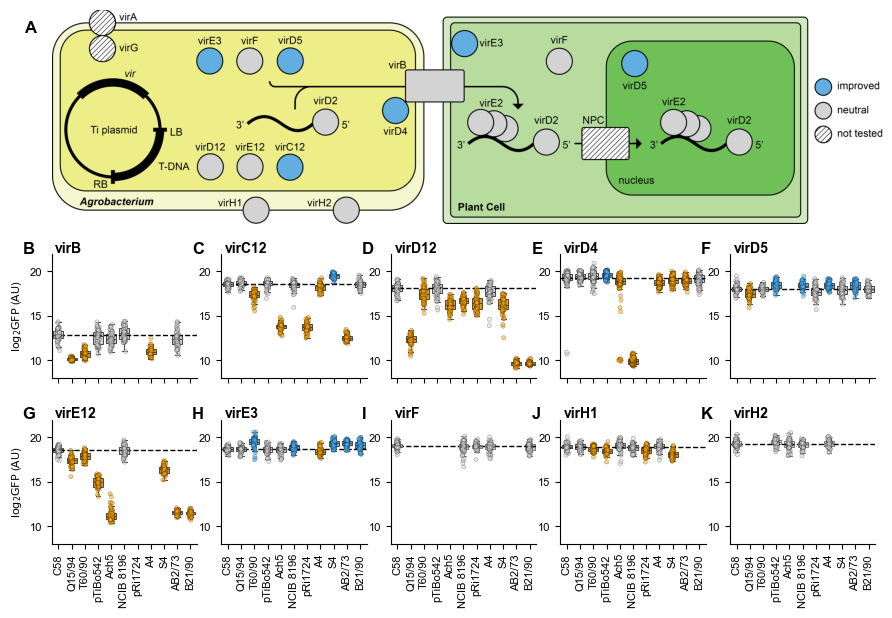

In [11]:
alleles = ['A4', 'Ach5', 'C58', 'NCIB', 'Q15', 'TiAB', 'TiBo', 'T60', 'B21','pRi', 'S4']

allele_map = {'A4':'A4', 
 'Ach5':'Ach5', 
 'B21':'B21/90', 
 'C58':'C58', 
 'NCIB':'NCIB 8196', 
 'Q15':'Q15/94', 
 'pRi':'pRi1724', 
 'S4':'S4',
 'T60':'T60/90', 
 'TiAB':'AB2/73', 
 'TiBo':'pTiBo542'
 }

allele_order = ['C58','Q15/94','T60/90','pTiBo542','Ach5','NCIB 8196','pRi1724','A4','S4','AB2/73','B21/90']

fig = plt.figure(figsize=(15,7))
gs1 = gridspec.GridSpec(7,14,hspace=.2,wspace=0)
gs = gridspec.GridSpec(7,14,hspace=1,wspace=0.4)

anno_opts = dict(xy=(1, 1.1), xycoords='axes fraction',va='top', ha='right',style='italic')

a_gs = fig.add_subplot(gs1[0:3, :10])
bi_gs = fig.add_subplot(gs[3:5, 0:2])
ci_gs = fig.add_subplot(gs[3:5, 2:4])
di_gs = fig.add_subplot(gs[3:5, 4:6])
ei_gs = fig.add_subplot(gs[3:5, 6:8])
fi_gs = fig.add_subplot(gs[3:5, 8:10])
gi_gs = fig.add_subplot(gs[5:7, 0:2])
hi_gs = fig.add_subplot(gs[5:7, 2:4])
ii_gs = fig.add_subplot(gs[5:7, 4:6])
ji_gs = fig.add_subplot(gs[5:7, 6:8])
ki_gs = fig.add_subplot(gs[5:7, 8:10])

virB_df = pd.read_excel('2023.2.6 virB allele.xlsx',sheet_name='data')
# virB_df = virB_df[virB_df.Strain.isin(['A4','Ach5', 'C58', 'NCIB', 'Q15', 'TiAB','T60', 'TiBo'])]
virB_df['vir'] = 'virB'
virC_df = pd.read_excel('2022.9.5 virC12 alleles.xlsx',sheet_name='data')
# virC_df = virC_df[virC_df.Strain.isin(['A4', 'Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'pRi', 'S4','T60', 'TiAB', 'TiBo'])]
virC_df['vir'] = 'virC'
virD12_df = pd.read_excel('2022.7.25 virD allele.xlsx',sheet_name='data')
# virD12_df = virD12_df[virD12_df.Strain.isin(['A4', 'Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'pRi', 'S4','T60', 'TiAB', 'TiBo'])]
virD12_df['vir'] = 'virD12'
virD4_df = pd.read_excel('2022.10.17 vird4 allle.xlsx',sheet_name='data')
# virD4_df = virD4_df[virD4_df.Strain.isin(['A4','Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4','T60', 'TiAB', 'TiBo'])]
virD4_df['vir'] = 'virD4'
virD5_df = pd.read_excel('2022.11.7 virD5 virE3 alleles.xlsx',sheet_name='virD5_data')
# virD5_df = virD5_df[virD5_df.Strain.isin(['A4', 'B21', 'C58', 'NCIB', 'Q15', 'S4','pRi','T60', 'TiAB', 'TiBo'])]
virD5_df['vir'] = 'virD5'
virE12_df = pd.read_excel('2022.9.12 virE12 allele.xlsx',sheet_name='data')
# virE12_df = virE12_df[virE12_df.Strain.isin(['Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4','T60', 'TiAB', 'TiBo'])]
virE12_df['vir'] = 'virE12'
virE3_df = pd.read_excel('2022.11.7 virD5 virE3 alleles.xlsx',sheet_name='virE3_data')
# virE3_df = virE3_df[virE3_df.Strain.isin(['A4','Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4','T60', 'TiAB', 'TiBo'])]
virE3_df['vir'] = 'virE3'
virF_df = pd.read_excel('2022.12.5 virF virH1.xlsx',sheet_name='dataF')
# virF_df = virF_df[virF_df.Strain.isin(['A4', 'B21', 'C58', 'NCIB'])]
virF_df['vir'] = 'virF'
virH1_df = pd.read_excel('2022.12.5 virF virH1.xlsx',sheet_name='dataH1')
# virH1_df = virH1_df[virH1_df.Strain.isin(['A4','Ach5', 'C58', 'NCIB', 'Q15', 'S4','pRi','T60', 'TiBo'])]
virH1_df['vir'] = 'virH1'
virH2_df = pd.read_excel('2023.1.9 virH2 allele virH12 comp.xlsx',sheet_name='data')
# virH2_df = virH2_df[virH2_df.Strain.isin(['A4','Ach5', 'C58', 'NCIB','TiBo'])]
virH2_df['vir'] = 'virH2'

df = pd.concat([
    virB_df,
    virC_df,
    virD12_df,
    virD4_df,
    virD5_df,
    virE12_df,
    virE3_df,
    virF_df,
    virH1_df,
    virH2_df
]).reset_index(drop=True).drop(columns=['Reader','GFP_non'])
df.to_pickle('fig3_plant_data.pkl')
df_dist_compare = pd.read_csv('../../04-plasmids/df_dist_compare_fixed.csv')

cluster_corr = {}
def plot_allele(fig_letter,allele_name,palette,plant_df,plant_ax,allele_df,hide_y=True,hide_x=False):
    plant_ax.annotate(fig_letter, xy=(-0.2, 1.1), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
    plant_ax.annotate(allele_name, xy=(0.025, 1.1), xycoords='axes fraction',va='top', ha='left',size=10,weight='bold')
    plant_df = plant_df[plant_df.Strain.isin(alleles)].copy()
    missing_alleles = [allele for allele in alleles if allele not in plant_df['Strain'].unique()] 
    plant_df = plant_df.copy()
    for missing_allele in missing_alleles:
        temp_df = pd.DataFrame(data = [[None,0,missing_allele,None,None,allele_name]],columns=['Well', 'GFP', 'Strain', 'Plant', 'Leaf', 'vir'])
        plant_df = pd.concat([plant_df, temp_df])
    plant_df['GFP_log'] = plant_df.GFP.apply(np.log2)
    palette.update({allele:'lightgrey' for allele in alleles if allele not in palette})
    palette = {allele_map[k]:v for k,v in palette.items()}
    plant_df['Strain'] = plant_df['Strain'].map(allele_map)
    g = sns.boxplot(x="Strain",y="GFP_log",data=plant_df,palette=palette,order=allele_order,width=0.75,linewidth=0.75,showfliers=False,ax=plant_ax)
    sns.stripplot(x="Strain",y="GFP_log",data=plant_df,size=3,palette=palette,order=allele_order,edgecolor='black',linewidth=0.25,color='grey',alpha=.5,ax=plant_ax)
    plant_ax.axhline(y=plant_df.query('Strain == "C58"').mean()['GFP_log'], color = 'black', linestyle = 'dashed',linewidth=1)

    sns.despine()
    g.set(ylabel='$\mathrm{log_{2}{GFP}}$ (AU)',xlabel=None)
    if hide_x:
        g.set(xticklabels=[])
    else:
        g.set_xticklabels(g.get_xticklabels(), rotation=90)
    if hide_y:
        g.set(ylabel=None)

    g.yaxis.set_major_locator(ticker.MultipleLocator(5))
    g.set_ylim(bottom=8,top=22)
#     allele_df = allele_df.copy()
#     allele_df['allele'] = allele_df['allele'].map(allele_map)
#     grouped_df = allele_df.groupby(['cluster','allele']).mean().reset_index().copy()
#     g = sns.scatterplot(data=grouped_df,x='dist',y='GFP',linewidth=1,palette=palette,hue='allele',edgecolor='black',ax=allele_ax,s=20)
#     allele_ax.ticklabel_format(style='sci', axis='y',scilimits=(0, 0))    
#     g.legend().remove()
# #     g.yaxis.set_major_locator(ticker.MultipleLocator(5))
# #     g.set_ylim(bottom=8,top=22)
#     pearson = scipy.stats.pearsonr(allele_df.dist,allele_df.GFP)
#     correlation, pvalue = pearson
#     if hide_x:
#         g.set(xlabel=None,ylabel='GFP (AU)')
#     else:
#         g.set(xlabel='Distance',ylabel='GFP (AU)')

    # if pearson.pvalue < 0.01:
    #     allele_ax.annotate(f'r = {pearson.statistic:.2f} p = {pearson.pvalue:.2g}', **anno_opts,size=6.5)
    # else:
    #     allele_ax.annotate(f'r = {pearson.statistic:.2f} p = {pearson.pvalue:.2f}', **anno_opts,size=6.5)
    # allele_ax.annotate(f'r = {correlation:.2f} p = {pvalue:.2f}', **anno_opts,size=6.5)
    # cluster_corr[allele_name] = correlation
    # sns.despine()

#     x = set(plant_df['Strain'].unique()).symmetric_difference(set(allele_df['allele'].unique()))
#     print(allele_name,len(plant_df['Strain'].unique()),len(allele_df['allele'].unique()))

    return None

# ============== A ============
a_gs.annotate(f'A', xy=(-0.0325, 0.95), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
a_gs.imshow(plt.imread(f'eLW011_diagram_v4.png'),aspect='equal')
a_gs.axis('off')

# ============== B ============
pink = 'orange'
plot_allele(fig_letter='B',
            allele_name='virB',
            palette={'A4': pink,
                     'Ach5': 'lightgrey',
                     'Q15': pink,
                     'T60':pink,
                     'TiAB':'lightgrey',
                     'C58': 'lightgrey',
                     'NCIB': 'lightgrey',
                     'TiBo': 'lightgrey'},
            plant_df=df.query('vir == "virB"'),
            plant_ax=bi_gs,
            allele_df=df_dist_compare.query(f'cluster == "virB4"'),
            hide_y=False,
            hide_x=True
            )

plot_allele(fig_letter='C',
            allele_name='virC12',
            palette={'A4': pink,
                    'Ach5': pink,
                    'B21': 'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey',
                    'Q15': 'lightgrey',
                    'pRi': pink,
                    'S4': blue,
                    'T60': pink,
                    'TiAB': pink,
                    'TiBo': 'lightgrey'},
            plant_df=df.query('vir == "virC"'),
            plant_ax=ci_gs,
            allele_df=df_dist_compare.query(f'cluster == "virC12"'),
            hide_x=True
            )

plot_allele(fig_letter='D',
            allele_name='virD12',
            palette={'A4': 'lightgrey',
                    'Ach5': pink,
                    'B21': pink,
                    'C58': 'lightgrey',
                    'NCIB': pink,
                    'Q15': pink,
                    'pRi': pink,
                    'S4': pink,
                    'T60': pink,
                    'TiAB': pink,
                    'TiBo': 'lightgrey'},
            plant_df=df.query('vir == "virD12"'),
            plant_ax=di_gs,
            allele_df=df_dist_compare.query(f'cluster == "virD12"'),
            hide_x=True
            )

plot_allele(fig_letter='E',
            allele_name='virD4',
            palette={'A4':pink,
                    'Ach5': pink,
                    'B21': 'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': pink,
                    'Q15': 'lightgrey',
                    'S4': pink,
                    'T60': 'lightgrey',
                    'TiAB': pink,
                    'TiBo': blue},
            plant_df=df.query('vir == "virD4"'),
            plant_ax=ei_gs,
            allele_df=df_dist_compare.query(f'cluster == "virD4"'),
            hide_x=True
            )

plot_allele(fig_letter='F',
            allele_name='virD5',
            palette={'A4':blue,
                    'B21': 'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': blue,
                    'Q15': pink,
                    'S4': 'lightgrey',
                    'T60': 'lightgrey',
                    'TiAB': blue,
                    'TiBo': blue,
                    'pRi':'lightgrey'},
            plant_df=df.query('vir == "virD5"'),
            plant_ax=fi_gs,
            allele_df=df_dist_compare.query(f'cluster == "virD5"'),
            hide_x=True
            )

plot_allele(fig_letter='G',
            allele_name='virE12',
            palette={'Ach5': pink,
                    'B21': pink,
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey',
                    'Q15': pink,
                    'S4': pink,
                    'T60': pink,
                    'TiAB': pink,
                    'TiBo': pink},
            plant_df=df.query('vir == "virE12"'),
            plant_ax=gi_gs,
            allele_df=df_dist_compare.query(f'cluster == "virE12"'),
            hide_y=False,
            hide_x=False
            )

plot_allele(fig_letter='H',
            allele_name='virE3',
            palette={'A4':pink,
                    'B21': blue,
                    'C58': 'lightgrey',
                    'NCIB': blue,
                    'Q15': 'lightgrey',
                    'S4': blue,
                    'T60': blue,
                    'TiAB': blue,
                    'TiBo': 'lightgrey',
                    'Ach5':'lightgrey'},
            plant_df=df.query('vir == "virE3"'),
            plant_ax=hi_gs,
            allele_df=df_dist_compare.query(f'cluster == "virE3"'),
            hide_x=False
            )

plot_allele(fig_letter='I',
            allele_name='virF',
            palette={'A4':'lightgrey',
                    'B21': 'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey'},
            plant_df=df.query('vir == "virF"'),
            plant_ax=ii_gs,
            allele_df=df_dist_compare.query(f'cluster == "virF"'),
            hide_x=False
            )

plot_allele(fig_letter='J',
            allele_name='virH1',
            palette={'A4':'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey',
                    'Q15': 'lightgrey',
                    'S4': pink,
                    'T60': pink,
                    'pRi': pink,
                    'TiBo': pink,
                    'Ach5':'lightgrey'},
            plant_df=df.query('vir == "virH1"'),
            plant_ax=ji_gs,
            allele_df=df_dist_compare.query(f'cluster == "virH1"'),
            hide_x=False
            )

plot_allele(fig_letter='K',
            allele_name='virH2',
            palette={'A4':'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey',
                    'TiBo': 'lightgrey',
                    'Ach5':'lightgrey'},
            plant_df=df.query('vir == "virH2"'),
            plant_ax=ki_gs,
            allele_df=df_dist_compare.query(f'cluster == "virH2"'),
            hide_x=False
            )

fig.savefig('fig3_v2.png',dpi=600,facecolor='white',bbox_inches='tight')
fig.savefig(f'fig3_v2.pdf',dpi=600,transparent=False,bbox_inches='tight')
plt.show()

In [12]:
np.log2( df.query('vir == "virB" and Strain == "C58"').mean() )

/home/lucas/anaconda3/envs/cs285py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


GFP      12.993030
Plant     2.169925
dtype: float64

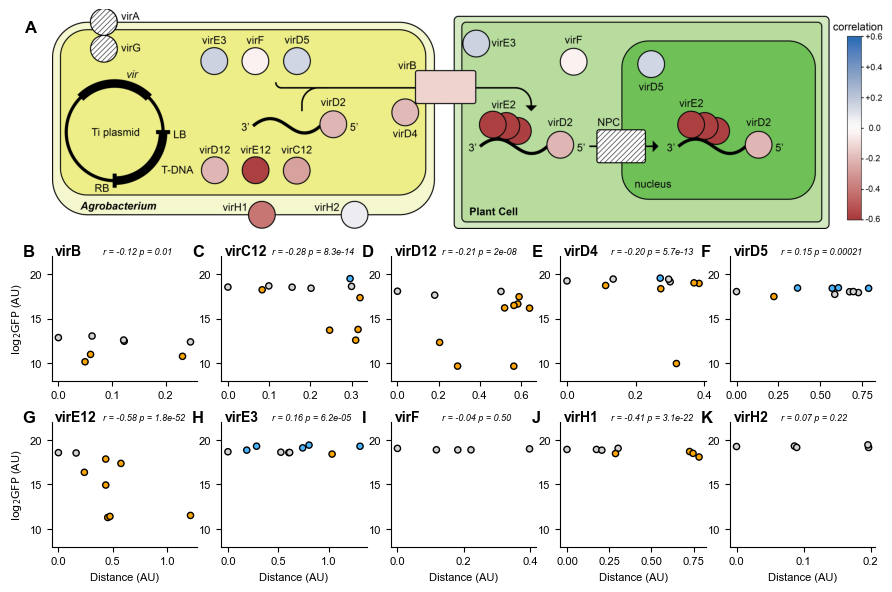

In [13]:
alleles = ['A4', 'Ach5', 'C58', 'NCIB', 'Q15', 'TiAB', 'TiBo', 'T60', 'B21','pRi', 'S4']

allele_map = {'A4':'A4', 
 'Ach5':'Ach5', 
 'B21':'B21/90', 
 'C58':'C58', 
 'NCIB':'NCIB 8196', 
 'Q15':'Q15/94', 
 'pRi':'pRi1724', 
 'S4':'S4',
 'T60':'T60/90', 
 'TiAB':'AB2/73', 
 'TiBo':'pTiBo542'
 }

allele_order = ['C58','Q15/94','T60/90','pTiBo542','Ach5','NCIB 8196','pRi1724','A4','S4','AB2/73','B21/90']

fig = plt.figure(figsize=(15,7))
gs1 = gridspec.GridSpec(7,14,hspace=.2,wspace=0)
gs = gridspec.GridSpec(7,14,hspace=1,wspace=0.4)

anno_opts = dict(xy=(0.35, 1.075), xycoords='axes fraction',va='top', ha='left',style='italic')

a_gs = fig.add_subplot(gs1[0:3, :10])
bi_gs = fig.add_subplot(gs[3:5, 0:2])
ci_gs = fig.add_subplot(gs[3:5, 2:4])
di_gs = fig.add_subplot(gs[3:5, 4:6])
ei_gs = fig.add_subplot(gs[3:5, 6:8])
fi_gs = fig.add_subplot(gs[3:5, 8:10])
gi_gs = fig.add_subplot(gs[5:7, 0:2])
hi_gs = fig.add_subplot(gs[5:7, 2:4])
ii_gs = fig.add_subplot(gs[5:7, 4:6])
ji_gs = fig.add_subplot(gs[5:7, 6:8])
ki_gs = fig.add_subplot(gs[5:7, 8:10])

virB_df = pd.read_excel('2023.2.6 virB allele.xlsx',sheet_name='data')
# virB_df = virB_df[virB_df.Strain.isin(['A4','Ach5', 'C58', 'NCIB', 'Q15', 'TiAB','T60', 'TiBo'])]
virB_df['vir'] = 'virB'
virC_df = pd.read_excel('2022.9.5 virC12 alleles.xlsx',sheet_name='data')
# virC_df = virC_df[virC_df.Strain.isin(['A4', 'Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'pRi', 'S4','T60', 'TiAB', 'TiBo'])]
virC_df['vir'] = 'virC'
virD12_df = pd.read_excel('2022.7.25 virD allele.xlsx',sheet_name='data')
# virD12_df = virD12_df[virD12_df.Strain.isin(['A4', 'Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'pRi', 'S4','T60', 'TiAB', 'TiBo'])]
virD12_df['vir'] = 'virD12'
virD4_df = pd.read_excel('2022.10.17 vird4 allle.xlsx',sheet_name='data')
# virD4_df = virD4_df[virD4_df.Strain.isin(['A4','Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4','T60', 'TiAB', 'TiBo'])]
virD4_df['vir'] = 'virD4'
virD5_df = pd.read_excel('2022.11.7 virD5 virE3 alleles.xlsx',sheet_name='virD5_data')
# virD5_df = virD5_df[virD5_df.Strain.isin(['A4', 'B21', 'C58', 'NCIB', 'Q15', 'S4','pRi','T60', 'TiAB', 'TiBo'])]
virD5_df['vir'] = 'virD5'
virE12_df = pd.read_excel('2022.9.12 virE12 allele.xlsx',sheet_name='data')
# virE12_df = virE12_df[virE12_df.Strain.isin(['Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4','T60', 'TiAB', 'TiBo'])]
virE12_df['vir'] = 'virE12'
virE3_df = pd.read_excel('2022.11.7 virD5 virE3 alleles.xlsx',sheet_name='virE3_data')
# virE3_df = virE3_df[virE3_df.Strain.isin(['A4','Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4','T60', 'TiAB', 'TiBo'])]
virE3_df['vir'] = 'virE3'
virF_df = pd.read_excel('2022.12.5 virF virH1.xlsx',sheet_name='dataF')
# virF_df = virF_df[virF_df.Strain.isin(['A4', 'B21', 'C58', 'NCIB'])]
virF_df['vir'] = 'virF'
virH1_df = pd.read_excel('2022.12.5 virF virH1.xlsx',sheet_name='dataH1')
# virH1_df = virH1_df[virH1_df.Strain.isin(['A4','Ach5', 'C58', 'NCIB', 'Q15', 'S4','pRi','T60', 'TiBo'])]
virH1_df['vir'] = 'virH1'
virH2_df = pd.read_excel('2023.1.9 virH2 allele virH12 comp.xlsx',sheet_name='data')
# virH2_df = virH2_df[virH2_df.Strain.isin(['A4','Ach5', 'C58', 'NCIB','TiBo'])]
virH2_df['vir'] = 'virH2'

df = pd.concat([
    virB_df,
    virC_df,
    virD12_df,
    virD4_df,
    virD5_df,
    virE12_df,
    virE3_df,
    virF_df,
    virH1_df,
    virH2_df
]).reset_index(drop=True).drop(columns=['Reader','GFP_non'])
df.to_pickle('fig3_plant_data.pkl')
df_dist_compare = pd.read_csv('../../04-plasmids/df_dist_compare_fixed.csv')

cluster_corr = {}
def plot_allele(fig_letter,allele_name,palette,plant_df,plant_ax,allele_df,hide_y=True,hide_x=False):
    plant_ax.annotate(fig_letter, xy=(-0.2, 1.1), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
    plant_ax.annotate(allele_name, xy=(0.025, 1.1), xycoords='axes fraction',va='top', ha='left',size=10,weight='bold')
    plant_df = plant_df[plant_df.Strain.isin(alleles)].copy()
    missing_alleles = [allele for allele in alleles if allele not in plant_df['Strain'].unique()] 
    plant_df = plant_df.copy()
    for missing_allele in missing_alleles:
        temp_df = pd.DataFrame(data = [[None,0,missing_allele,None,None,allele_name]],columns=['Well', 'GFP', 'Strain', 'Plant', 'Leaf', 'vir'])
        plant_df = pd.concat([plant_df, temp_df])
    plant_df['GFP_log'] = plant_df.GFP.apply(np.log2)
    palette.update({allele:'lightgrey' for allele in alleles if allele not in palette})
    palette = {allele_map[k]:v for k,v in palette.items()}
    plant_df['Strain'] = plant_df['Strain'].map(allele_map)
    # g = sns.boxplot(x="Strain",y="GFP_log",data=plant_df,palette=palette,order=allele_order,width=0.75,linewidth=0.75,showfliers=False,ax=plant_ax)
    # sns.stripplot(x="Strain",y="GFP_log",data=plant_df,size=3,palette=palette,order=allele_order,edgecolor='black',linewidth=0.25,color='grey',alpha=.5,ax=plant_ax)
    # sns.despine()
    # g.set(ylabel='$\mathrm{log_{2}{GFP}}$ (AU)',xlabel=None)
    # if hide_x:
    #     g.set(xticklabels=[])
    # else:
    #     g.set_xticklabels(g.get_xticklabels(), rotation=90)
    # if hide_y:
    #     g.set(ylabel=None)

    # g.yaxis.set_major_locator(ticker.MultipleLocator(5))
    # g.set_ylim(bottom=8,top=22)
    allele_df = allele_df.copy()
    allele_df['allele'] = allele_df['allele'].map(allele_map)
    grouped_df = allele_df.groupby(['cluster','allele']).mean().reset_index().copy()
    allele_ax = plant_ax
    g = sns.scatterplot(data=grouped_df,x='dist',y='GFP_log',linewidth=1,palette=palette,hue='allele',edgecolor='black',ax=allele_ax,s=20)
    # allele_ax.ticklabel_format(style='sci', axis='y',scilimits=(0, 0))    
    g.legend().remove()
    g.yaxis.set_major_locator(ticker.MultipleLocator(5))
    g.set_ylim(bottom=8,top=22)
    pearson = scipy.stats.pearsonr(allele_df.dist,allele_df.GFP)
    correlation, pvalue = pearson
    if hide_x:
        g.set(xlabel=None,ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')
    else:
        g.set(xlabel='Distance (AU)',ylabel='$\mathrm{log_{2}{GFP}}$ (AU)')

    if pvalue < 0.001:
        allele_ax.annotate(f'r = {correlation:.2f} p = {pvalue:.2g}', **anno_opts,size=6.5)
    else:
        allele_ax.annotate(f'r = {correlation:.2f} p = {pvalue:.2f}', **anno_opts,size=6.5)
    # allele_ax.annotate(f'r = {correlation:.2f} p = {pvalue:.2f}', **anno_opts,size=6.5)
    cluster_corr[allele_name] = correlation
    sns.despine()
    if hide_y:
        g.set(ylabel=None)
    g.yaxis.set_major_locator(ticker.MultipleLocator(5))
    g.set_ylim(bottom=8,top=22)
    # x = set(plant_df['Strain'].unique()).symmetric_difference(set(allele_df['allele'].unique()))
    # print(allele_name,len(plant_df['Strain'].unique()),len(allele_df['allele'].unique()))

    return None

# ============== A ============
a_gs.annotate(f'A', xy=(-0.0325, 0.95), xycoords='axes fraction',va='top', ha='left',size=12,weight='bold')
a_gs.imshow(plt.imread(f'eLW011_diagram_v2.png'),aspect='equal')
a_gs.axis('off')

# ============== B ============

plot_allele(fig_letter='B',
            allele_name='virB',
            palette={'A4': pink,
                     'Ach5': 'lightgrey',
                     'Q15': pink,
                     'T60':pink,
                     'TiAB':'lightgrey',
                     'C58': 'lightgrey',
                     'NCIB': 'lightgrey',
                     'TiBo': 'lightgrey'},
            plant_df=df.query('vir == "virB"'),
            plant_ax=bi_gs,
            allele_df=df_dist_compare.query(f'cluster == "virB4"'),
            hide_y=False,
            hide_x=True
            )

plot_allele(fig_letter='C',
            allele_name='virC12',
            palette={'A4': pink,
                    'Ach5': pink,
                    'B21': 'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey',
                    'Q15': 'lightgrey',
                    'pRi': pink,
                    'S4': blue,
                    'T60': pink,
                    'TiAB': pink,
                    'TiBo': 'lightgrey'},
            plant_df=df.query('vir == "virC"'),
            plant_ax=ci_gs,
            allele_df=df_dist_compare.query(f'cluster == "virC12"'),
            hide_x=True
            )

plot_allele(fig_letter='D',
            allele_name='virD12',
            palette={'A4': 'lightgrey',
                    'Ach5': pink,
                    'B21': pink,
                    'C58': 'lightgrey',
                    'NCIB': pink,
                    'Q15': pink,
                    'pRi': pink,
                    'S4': pink,
                    'T60': pink,
                    'TiAB': pink,
                    'TiBo': 'lightgrey'},
            plant_df=df.query('vir == "virD12"'),
            plant_ax=di_gs,
            allele_df=df_dist_compare.query(f'cluster == "virD12"'),
            hide_x=True
            )

plot_allele(fig_letter='E',
            allele_name='virD4',
            palette={'A4':pink,
                    'Ach5': pink,
                    'B21': 'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': pink,
                    'Q15': 'lightgrey',
                    'S4': pink,
                    'T60': 'lightgrey',
                    'TiAB': pink,
                    'TiBo': blue},
            plant_df=df.query('vir == "virD4"'),
            plant_ax=ei_gs,
            allele_df=df_dist_compare.query(f'cluster == "virD4"'),
            hide_x=True
            )

plot_allele(fig_letter='F',
            allele_name='virD5',
            palette={'A4':blue,
                    'B21': 'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': blue,
                    'Q15': pink,
                    'S4': 'lightgrey',
                    'T60': 'lightgrey',
                    'TiAB': blue,
                    'TiBo': blue,
                    'pRi':'lightgrey'},
            plant_df=df.query('vir == "virD5"'),
            plant_ax=fi_gs,
            allele_df=df_dist_compare.query(f'cluster == "virD5"'),
            hide_x=True
            )

plot_allele(fig_letter='G',
            allele_name='virE12',
            palette={'Ach5': pink,
                    'B21': pink,
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey',
                    'Q15': pink,
                    'S4': pink,
                    'T60': pink,
                    'TiAB': pink,
                    'TiBo': pink},
            plant_df=df.query('vir == "virE12"'),
            plant_ax=gi_gs,
            allele_df=df_dist_compare.query(f'cluster == "virE12"'),
            hide_y=False,
            hide_x=False
            )

plot_allele(fig_letter='H',
            allele_name='virE3',
            palette={'A4':pink,
                    'B21': blue,
                    'C58': 'lightgrey',
                    'NCIB': blue,
                    'Q15': 'lightgrey',
                    'S4': blue,
                    'T60': blue,
                    'TiAB': blue,
                    'TiBo': 'lightgrey',
                    'Ach5':'lightgrey'},
            plant_df=df.query('vir == "virE3"'),
            plant_ax=hi_gs,
            allele_df=df_dist_compare.query(f'cluster == "virE3"'),
            hide_x=False
            )

plot_allele(fig_letter='I',
            allele_name='virF',
            palette={'A4':'lightgrey',
                    'B21': 'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey'},
            plant_df=df.query('vir == "virF"'),
            plant_ax=ii_gs,
            allele_df=df_dist_compare.query(f'cluster == "virF"'),
            hide_x=False
            )

plot_allele(fig_letter='J',
            allele_name='virH1',
            palette={'A4':'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey',
                    'Q15': 'lightgrey',
                    'S4': pink,
                    'T60': pink,
                    'pRi': pink,
                    'TiBo': pink,
                    'Ach5':'lightgrey'},
            plant_df=df.query('vir == "virH1"'),
            plant_ax=ji_gs,
            allele_df=df_dist_compare.query(f'cluster == "virH1"'),
            hide_x=False
            )

plot_allele(fig_letter='K',
            allele_name='virH2',
            palette={'A4':'lightgrey',
                    'C58': 'lightgrey',
                    'NCIB': 'lightgrey',
                    'TiBo': 'lightgrey',
                    'Ach5':'lightgrey'},
            plant_df=df.query('vir == "virH2"'),
            plant_ax=ki_gs,
            allele_df=df_dist_compare.query(f'cluster == "virH2"'),
            hide_x=False
            )

fig.savefig('fig3_v3.png',dpi=600,facecolor='white',bbox_inches='tight')
fig.savefig(f'fig3_v3.pdf',dpi=600,transparent=False,bbox_inches='tight')
plt.show()